In [1]:
print("hello world")

hello world


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
file_path = "C:/Users/hp/Desktop/scrapping final/combined_zameen_data.csv"
df = pd.read_csv(file_path)

In [4]:
df.head()

agency       price  \
0  Personal Property   1.2 Crore   
1  Personal Property   4.2 Crore   
2  Personal Property   3.2 Crore   
3  Personal Property  1.95 Crore   
4  Personal Property     2 Crore   

                                            location  \
0                        New Shalimar Colony, Multan   
1                DHA Phase 1 - Sector H, DHA Phase 1   
2  Buch Executive Villas Extension, Buch Executiv...   
3                      Buch Executive Villas, Multan   
4                            DHA Villas, DHA Defence   

                                                link  bedrooms bathrooms  \
0  https://www.zameen.com/Property/multan_new_sha...       3.0         4   
1  https://www.zameen.com/Property/dha_phase_1_dh...       7.0         6   
2  https://www.zameen.com/Property/buch_executive...       6.0         6   
3  https://www.zameen.com/Property/multan_buch_ex...       4.0         6   
4  https://www.zameen.com/Property/dha_defence_dh...       3.0         3   

        area  
0    4 Marla  
1    1 Kanal  
2  8.3 Marla  
3    5 Marla  
4    5 Marla

In [5]:
df.isnull().sum()

agency       475
price          0
location       0
link           0
bedrooms      13
bathrooms     13
area          25
dtype: int64

In [6]:
df.dtypes

agency        object
price         object
location      object
link          object
bedrooms     float64
bathrooms     object
area          object
dtype: object

In [7]:
df.duplicated().sum()

25

In [8]:
duplicates = df[df.duplicated()]

In [9]:
print(duplicates)

       agency       price                                           location  \
76   Titanium   3.6 Crore  Buch Executive Villas - Phase 2, Buch Executiv...   
77   Titanium  2.85 Crore                      Buch Executive Villas, Multan   
128  Titanium  3.38 Crore                      Buch Executive Villas, Multan   
192  Titanium     3 Crore             Royal Orchard - Block C, Royal Orchard   
193  Titanium  3.45 Crore             Royal Orchard - Block E, Royal Orchard   
217  Titanium  1.12 Crore                                 Bahadurpur, Multan   
218  Titanium   1.6 Crore             Royal Orchard - Block F, Royal Orchard   
219  Titanium   5.7 Crore             Royal Orchard - Block B, Royal Orchard   
220  Titanium   4.5 Crore                DHA Phase 1 - Sector M, DHA Phase 1   
221  Titanium  3.85 Crore                                DHA Defence, Multan   
426  Titanium   2.3 Crore                      Buch Executive Villas, Multan   
427  Titanium   6.1 Crore               

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(1250, 7)

okay we have a lot of issues

In [13]:
df.isnull().sum()

agency       472
price          0
location       0
link           0
bedrooms      13
bathrooms     13
area          25
dtype: int64

In [14]:
df["agency"].unique()

array(['Personal Property', 'Titanium', nan], dtype=object)

In [15]:
df['agency'] = df['agency'].fillna('Personal Property')

In [16]:
df.isnull().sum()

agency        0
price         0
location      0
link          0
bedrooms     13
bathrooms    13
area         25
dtype: int64

In [17]:
df.shape

(1250, 7)

In [18]:
df = df.dropna()

In [19]:
df.shape

(1225, 7)

In [20]:
df.isnull().sum()

agency       0
price        0
location     0
link         0
bedrooms     0
bathrooms    0
area         0
dtype: int64

okay clean data 

In [21]:
df.dtypes

agency        object
price         object
location      object
link          object
bedrooms     float64
bathrooms     object
area          object
dtype: object

In [22]:
df["price"].unique()

array(['1.2 Crore', '4.2 Crore', '3.2 Crore', '1.95 Crore', '2 Crore',
       '7.45 Crore', '3.5 Crore', '2.6 Crore', '3.8 Crore', '2.05 Crore',
       '4.9 Crore', '77 Lakh', '2.5 Crore', '3.3 Crore', '1 Crore',
       '1.45 Crore', '1.55 Crore', '1.7 Crore', '4.8 Crore', '1.75 Crore',
       '5.9 Crore', '1.15 Crore', '4.5 Crore', '6 Crore', '1.5 Crore',
       '3.6 Crore', '2.85 Crore', '2.1 Crore', '2.9 Crore', '3.85 Crore',
       '4.6 Crore', '3.56 Crore', '3.35 Crore', '1.65 Crore',
       '1.58 Crore', '3.38 Crore', '4.15 Crore', '1.72 Crore',
       '1.52 Crore', '1.8 Crore', '7 Crore', '3.45 Crore', '2.4 Crore',
       '3.25 Crore', '3.65 Crore', '6.15 Crore', '1.4 Crore',
       '2.47 Crore', '4.88 Crore', '2.87 Crore', '1.88 Crore',
       '1.28 Crore', '1.49 Crore', '4.1 Crore', '1.6 Crore', '4 Crore',
       '1.69 Crore', '3.7 Crore', '10 Crore', '1.1 Crore', '6.95 Crore',
       '4.45 Crore', '2.8 Crore', '1.35 Crore', '3.75 Crore', '2.7 Crore',
       '6.5 Crore', '3.22

In [23]:
def convert_price(price_str):

    price_str = str(price_str).lower() #lower case to make it case insensitive.

    if 'crore' in price_str and 'lakh' in price_str:
        crore_part, lakh_part = price_str.split('crore')
        crore_val = int(''.join(filter(str.isdigit, crore_part)))
        lakh_val = int(''.join(filter(str.isdigit, lakh_part)))
        return (crore_val * 100) + lakh_val

    elif 'crore' in price_str:
        crore_val = int(''.join(filter(str.isdigit, price_str)))
        return crore_val * 100

    elif 'lakh' in price_str:
        lakh_val = int(''.join(filter(str.isdigit, price_str)))
        return lakh_val

    else:
        try: #if it's already a number or something that can be converted to integer.
            return int(price_str)
        except ValueError:
            return None 


df['price_lakhs'] = df['price'].apply(convert_price)


print(df[['price', 'price_lakhs']].head(10))

        price  price_lakhs
0   1.2 Crore         1200
1   4.2 Crore         4200
2   3.2 Crore         3200
3  1.95 Crore        19500
4     2 Crore          200
5  7.45 Crore        74500
6   3.5 Crore         3500
7   2.6 Crore         2600
8   3.8 Crore         3800
9  2.05 Crore        20500


In [24]:
df.columns

Index(['agency', 'price', 'location', 'link', 'bedrooms', 'bathrooms', 'area',
       'price_lakhs'],
      dtype='object')

In [25]:
df.dtypes

agency          object
price           object
location        object
link            object
bedrooms       float64
bathrooms       object
area            object
price_lakhs      int64
dtype: object

In [26]:
df["location"].unique()

array(['New Shalimar Colony, Multan',
       'DHA Phase 1 - Sector H, DHA Phase 1',
       'Buch Executive Villas Extension, Buch Executive Villas',
       'Buch Executive Villas, Multan', 'DHA Villas, DHA Defence',
       'Wapda Town Phase 1 - Block A, Wapda Town Phase 1',
       'Royal Orchard - Block C, Royal Orchard',
       'Fatima Jinnah Town - Block A, Fatima Jinnah Town',
       'Askari 3, DHA Defence', 'Northern Bypass, Multan',
       'MDA Co-operative Housing Scheme, Multan',
       'Wapda Town Phase 1 - Block B, Wapda Town Phase 1',
       'Bahadurpur, Multan', 'Citi Housing, Multan',
       'Royal Orchard, Multan Public School Road',
       'Shalimar Colony, Multan',
       'Wapda Town Phase 2 - Block M, Wapda Town Phase 2',
       'Wapda Town Phase 1 - Block D, Wapda Town Phase 1',
       'Wapda Town Phase 2 - Block Q, Wapda Town Phase 2',
       'Buch Executive Villas - Phase 2, Buch Executive Villas',
       'Suraj Kund Road, Multan',
       'Buch Executive Villas - Pha

In [27]:
df["location"].nunique()

128

In [28]:
df["location"].value_counts(ascending=False)

location
Buch Executive Villas, Multan                             409
Royal Orchard, Multan Public School Road                   89
Askari 3, DHA Defence                                      41
DHA Villas, DHA Defence                                    37
Buch Executive Villas - Phase 1, Buch Executive Villas     36
                                                         ... 
Fatima Jinnah Town - Block H, Fatima Jinnah Town            1
Green Homes, Multan                                         1
Al Quresh Housing Scheme, Multan                            1
Khanewal Road, Multan                                       1
Piran Ghaib Road, Multan                                    1
Name: count, Length: 128, dtype: int64

In [29]:
location_counts = df["location"].value_counts(ascending=False)

top_30 = location_counts[:23]

print(top_30)

location
Buch Executive Villas, Multan                             409
Royal Orchard, Multan Public School Road                   89
Askari 3, DHA Defence                                      41
DHA Villas, DHA Defence                                    37
Buch Executive Villas - Phase 1, Buch Executive Villas     36
Shalimar Colony, Multan                                    36
DHA Phase 1 - Sector M, DHA Phase 1                        33
Wapda Town Phase 1 - Block E, Wapda Town Phase 1           30
Bahadurpur, Multan                                         29
DHA Phase 1 - Sector H, DHA Phase 1                        24
Buch Executive Villas - Phase 2, Buch Executive Villas     23
Wapda Town Phase 2, Wapda Town                             23
Royal Orchard - Block F, Royal Orchard                     20
Multan Public School Road, Multan                          16
Serene Villas, Jinnah Avenue                               16
DHA Phase 1, DHA Defence                                   15

In [30]:
df.dtypes

agency          object
price           object
location        object
link            object
bedrooms       float64
bathrooms       object
area            object
price_lakhs      int64
dtype: object

In [31]:
df["bathrooms"].value_counts()

bathrooms
6    538
5    333
4    243
3     49
7     36
1     14
2     12
Name: count, dtype: int64

In [32]:
def convert_to_int(value):
    """Tries to convert a value to an integer."""
    try:
        return int(float(value))  # Convert to float first, then int
    except (ValueError, TypeError):
        return None  # Return None if conversion fails

df['bathrooms_int'] = df['bathrooms'].apply(convert_to_int)

df['bathrooms_int'] = pd.to_numeric(df['bathrooms_int'], errors='coerce').astype('Int64')


print(df[['bathrooms', 'bathrooms_int']].head())
print(df['bathrooms_int'].dtypes)

  bathrooms  bathrooms_int
0         4              4
1         6              6
2         6              6
3         6              6
4         3              3
Int64


In [33]:
df.dtypes

agency            object
price             object
location          object
link              object
bedrooms         float64
bathrooms         object
area              object
price_lakhs        int64
bathrooms_int      Int64
dtype: object

In [34]:
df["area"].unique()

array(['4 Marla', '1 Kanal', '8.3 Marla', '5 Marla', '11 Marla',
       '10 Marla', '6 Marla', '13 Marla', '3 Marla', '15 Marla',
       '1.2 Kanal', '5.1 Marla', '7 Marla', '9 Marla', '12 Marla',
       '6.5 Marla', '10.1 Marla', '17 Marla', '8.5 Marla', '2 Kanal',
       '10.5 Marla', '18 Marla', '8 Marla', '7.5 Marla', '5.5 Marla',
       '10.6 Marla', '7.6 Marla', '4.5 Marla', '4.2 Marla', '17.2 Marla',
       '3.7 Marla', '19 Marla', '16 Marla', '3.4 Marla', '1.1 Kanal',
       '1.3 Marla', '1.6 Kanal', '12.9 Marla', '2.4 Marla', '2.9 Marla',
       '11.5 Marla', '10.4 Marla', '1.5 Marla', '2.2 Marla', '2 Marla',
       '3.5 Marla', '6.4 Marla', '10.2 Marla', '9.1 Marla', '6.3 Marla',
       '3.6 Kanal', '17.5 Marla', '14 Marla', '10.7 Marla', '82.5 Kanal',
       '1.4 Kanal', '4.8 Marla', '4.6 Marla', '6.7 Marla', '6.6 Marla',
       '5.9 Marla', '3.1 Marla', '13.2 Marla', '8.2 Marla', '2.6 Marla',
       '1.8 Marla', '8.8 Marla', '1.6 Marla', '13.5 Marla', '8.9 Marla',
       '1

In [35]:
def convert_area_to_marlas(area_str):
    """Converts area strings like '10 marla' or '2 kanal' to marlas."""
    if pd.isnull(area_str):
        return None

    area_str = str(area_str).lower() #lower case.
    area_str = area_str.replace(" ", "") #remove spaces.

    if 'kanal' in area_str:
        kanal_val = ''.join(filter(str.isdigit, area_str))
        if kanal_val:
            return int(kanal_val) * 20
        else:
            return None 

    elif 'marla' in area_str:
        marla_val = ''.join(filter(str.isdigit, area_str))
        if marla_val:
            return int(marla_val)
        else:
            return None 

    else:
        try:
            return int(float(area_str)) #try to convert to int, if its already a number.
        except (ValueError, TypeError):
            return None 


df['area_marlas'] = df['area'].apply(convert_area_to_marlas)

df['area_marlas'] = pd.to_numeric(df['area_marlas'], errors='coerce').astype('Int64')

print(df[['area', 'area_marlas']].head(10))
print(df['area_marlas'].dtypes)

        area  area_marlas
0    4 Marla            4
1    1 Kanal           20
2  8.3 Marla           83
3    5 Marla            5
4    5 Marla            5
5    1 Kanal           20
6   11 Marla           11
7   10 Marla           10
8   10 Marla           10
9    6 Marla            6
Int64


thank God we have found otherwise.......

In [36]:
def convert_area_to_marlas(area_str):
    """Converts area strings like '10 marla' or '2 kanal' to marlas, handling decimals."""
    if pd.isnull(area_str):
        return None

    area_str = str(area_str).lower()
    area_str = area_str.replace(" ", "")

    if 'kanal' in area_str:
        kanal_val = ''.join(c for c in area_str if c.isdigit() or c == '.') #allow decimals
        if kanal_val:
            return float(kanal_val) * 20
        else:
            return None

    elif 'marla' in area_str:
        marla_val = ''.join(c for c in area_str if c.isdigit() or c == '.') #allow decimals
        if marla_val:
            return float(marla_val)
        else:
            return None

    else:
        try:
            return float(area_str) 
        except (ValueError, TypeError):
            return None

df['area_marlas'] = df['area'].apply(convert_area_to_marlas)

df['area_marlas'] = pd.to_numeric(df['area_marlas'], errors='coerce').astype('float64')

print(df[['area', 'area_marlas']].head(10))
print(df['area_marlas'].dtypes)

        area  area_marlas
0    4 Marla          4.0
1    1 Kanal         20.0
2  8.3 Marla          8.3
3    5 Marla          5.0
4    5 Marla          5.0
5    1 Kanal         20.0
6   11 Marla         11.0
7   10 Marla         10.0
8   10 Marla         10.0
9    6 Marla          6.0
float64


In [37]:
df.dtypes

agency            object
price             object
location          object
link              object
bedrooms         float64
bathrooms         object
area              object
price_lakhs        int64
bathrooms_int      Int64
area_marlas      float64
dtype: object

In [38]:

#df.drop(["price", "bathrooms", "area"], axis=1, inplace=True)

In [39]:
df.head()

agency       price  \
0  Personal Property   1.2 Crore   
1  Personal Property   4.2 Crore   
2  Personal Property   3.2 Crore   
3  Personal Property  1.95 Crore   
4  Personal Property     2 Crore   

                                            location  \
0                        New Shalimar Colony, Multan   
1                DHA Phase 1 - Sector H, DHA Phase 1   
2  Buch Executive Villas Extension, Buch Executiv...   
3                      Buch Executive Villas, Multan   
4                            DHA Villas, DHA Defence   

                                                link  bedrooms bathrooms  \
0  https://www.zameen.com/Property/multan_new_sha...       3.0         4   
1  https://www.zameen.com/Property/dha_phase_1_dh...       7.0         6   
2  https://www.zameen.com/Property/buch_executive...       6.0         6   
3  https://www.zameen.com/Property/multan_buch_ex...       4.0         6   
4  https://www.zameen.com/Property/dha_defence_dh...       3.0         3   

        area  price_lakhs  bathrooms_int  area_marlas  
0    4 Marla         1200              4          4.0  
1    1 Kanal         4200              6         20.0  
2  8.3 Marla         3200              6          8.3  
3    5 Marla        19500              6          5.0  
4    5 Marla          200              3          5.0

In [40]:
import re

In [41]:
def convert_price(price_str):
    if pd.isnull(price_str): return None
    price_str = str(price_str).lower().replace(" ", "")
    crore_match = re.search(r'([\d.]+)(crore)', price_str)
    lakh_match = re.search(r'([\d.]+)(lakh)', price_str)
    if crore_match and lakh_match: return (float(crore_match.group(1)) * 100) + float(lakh_match.group(1))
    elif crore_match: return float(crore_match.group(1)) * 100
    elif lakh_match: return float(lakh_match.group(1))
    else:
        try: return float(price_str)
        except (ValueError, TypeError): return None

df['new_price'] = df['price'].apply(convert_price)

print(df[['price', 'new_price']].head()) 
print(df['new_price'].dtypes) 

        price  new_price
0   1.2 Crore      120.0
1   4.2 Crore      420.0
2   3.2 Crore      320.0
3  1.95 Crore      195.0
4     2 Crore      200.0
float64


In [42]:
df.head()

agency       price  \
0  Personal Property   1.2 Crore   
1  Personal Property   4.2 Crore   
2  Personal Property   3.2 Crore   
3  Personal Property  1.95 Crore   
4  Personal Property     2 Crore   

                                            location  \
0                        New Shalimar Colony, Multan   
1                DHA Phase 1 - Sector H, DHA Phase 1   
2  Buch Executive Villas Extension, Buch Executiv...   
3                      Buch Executive Villas, Multan   
4                            DHA Villas, DHA Defence   

                                                link  bedrooms bathrooms  \
0  https://www.zameen.com/Property/multan_new_sha...       3.0         4   
1  https://www.zameen.com/Property/dha_phase_1_dh...       7.0         6   
2  https://www.zameen.com/Property/buch_executive...       6.0         6   
3  https://www.zameen.com/Property/multan_buch_ex...       4.0         6   
4  https://www.zameen.com/Property/dha_defence_dh...       3.0         3   

        area  price_lakhs  bathrooms_int  area_marlas  new_price  
0    4 Marla         1200              4          4.0      120.0  
1    1 Kanal         4200              6         20.0      420.0  
2  8.3 Marla         3200              6          8.3      320.0  
3    5 Marla        19500              6          5.0      195.0  
4    5 Marla          200              3          5.0      200.0

In [43]:

df.drop(["price", "bathrooms", "area", "price_lakhs"], axis=1, inplace=True)

In [44]:
df.head()

agency                                           location  \
0  Personal Property                        New Shalimar Colony, Multan   
1  Personal Property                DHA Phase 1 - Sector H, DHA Phase 1   
2  Personal Property  Buch Executive Villas Extension, Buch Executiv...   
3  Personal Property                      Buch Executive Villas, Multan   
4  Personal Property                            DHA Villas, DHA Defence   

                                                link  bedrooms  bathrooms_int  \
0  https://www.zameen.com/Property/multan_new_sha...       3.0              4   
1  https://www.zameen.com/Property/dha_phase_1_dh...       7.0              6   
2  https://www.zameen.com/Property/buch_executive...       6.0              6   
3  https://www.zameen.com/Property/multan_buch_ex...       4.0              6   
4  https://www.zameen.com/Property/dha_defence_dh...       3.0              3   

   area_marlas  new_price  
0          4.0      120.0  
1         20.0      420.0  
2          8.3      320.0  
3          5.0      195.0  
4          5.0      200.0

In [45]:
df.isnull().sum()

agency           0
location         0
link             0
bedrooms         0
bathrooms_int    0
area_marlas      0
new_price        0
dtype: int64

In [46]:
df.dtypes

agency            object
location          object
link              object
bedrooms         float64
bathrooms_int      Int64
area_marlas      float64
new_price        float64
dtype: object

In [47]:
df.head()

agency                                           location  \
0  Personal Property                        New Shalimar Colony, Multan   
1  Personal Property                DHA Phase 1 - Sector H, DHA Phase 1   
2  Personal Property  Buch Executive Villas Extension, Buch Executiv...   
3  Personal Property                      Buch Executive Villas, Multan   
4  Personal Property                            DHA Villas, DHA Defence   

                                                link  bedrooms  bathrooms_int  \
0  https://www.zameen.com/Property/multan_new_sha...       3.0              4   
1  https://www.zameen.com/Property/dha_phase_1_dh...       7.0              6   
2  https://www.zameen.com/Property/buch_executive...       6.0              6   
3  https://www.zameen.com/Property/multan_buch_ex...       4.0              6   
4  https://www.zameen.com/Property/dha_defence_dh...       3.0              3   

   area_marlas  new_price  
0          4.0      120.0  
1         20.0      420.0  
2          8.3      320.0  
3          5.0      195.0  
4          5.0      200.0

In [48]:
df["agency"].unique()

array(['Personal Property', 'Titanium'], dtype=object)

In [49]:
def convert_agency_to_int(agency_str):
    """Converts agency strings to integers."""
    if agency_str == 'Personal Property':
        return 0
    elif agency_str == 'Titanium':
        return 1
    else:
        return None  

df['agency_int'] = df['agency'].apply(convert_agency_to_int)

df['agency_int'] = pd.to_numeric(df['agency_int'], errors='coerce').astype('Int64')

print(df[['agency', 'agency_int']].head(10))
print(df['agency_int'].dtypes)

              agency  agency_int
0  Personal Property           0
1  Personal Property           0
2  Personal Property           0
3  Personal Property           0
4  Personal Property           0
5  Personal Property           0
6  Personal Property           0
7  Personal Property           0
8  Personal Property           0
9  Personal Property           0
Int64


In [50]:
df.head()

agency                                           location  \
0  Personal Property                        New Shalimar Colony, Multan   
1  Personal Property                DHA Phase 1 - Sector H, DHA Phase 1   
2  Personal Property  Buch Executive Villas Extension, Buch Executiv...   
3  Personal Property                      Buch Executive Villas, Multan   
4  Personal Property                            DHA Villas, DHA Defence   

                                                link  bedrooms  bathrooms_int  \
0  https://www.zameen.com/Property/multan_new_sha...       3.0              4   
1  https://www.zameen.com/Property/dha_phase_1_dh...       7.0              6   
2  https://www.zameen.com/Property/buch_executive...       6.0              6   
3  https://www.zameen.com/Property/multan_buch_ex...       4.0              6   
4  https://www.zameen.com/Property/dha_defence_dh...       3.0              3   

   area_marlas  new_price  agency_int  
0          4.0      120.0           0  
1         20.0      420.0           0  
2          8.3      320.0           0  
3          5.0      195.0           0  
4          5.0      200.0           0

In [51]:
df["agency_int"].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

In [52]:
df.drop(["agency"], axis=1, inplace=True)

In [53]:
df.head()

location  \
0                        New Shalimar Colony, Multan   
1                DHA Phase 1 - Sector H, DHA Phase 1   
2  Buch Executive Villas Extension, Buch Executiv...   
3                      Buch Executive Villas, Multan   
4                            DHA Villas, DHA Defence   

                                                link  bedrooms  bathrooms_int  \
0  https://www.zameen.com/Property/multan_new_sha...       3.0              4   
1  https://www.zameen.com/Property/dha_phase_1_dh...       7.0              6   
2  https://www.zameen.com/Property/buch_executive...       6.0              6   
3  https://www.zameen.com/Property/multan_buch_ex...       4.0              6   
4  https://www.zameen.com/Property/dha_defence_dh...       3.0              3   

   area_marlas  new_price  agency_int  
0          4.0      120.0           0  
1         20.0      420.0           0  
2          8.3      320.0           0  
3          5.0      195.0           0  
4          5.0      200.0           0

In [54]:
df['price_per_marla'] = df['new_price'] / df['area_marlas']

# Handle potential issues (division by zero, etc.)
df['price_per_marla'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)
df['price_per_marla'].fillna(0, inplace=True)

print(df)

                                               location  \
0                           New Shalimar Colony, Multan   
1                   DHA Phase 1 - Sector H, DHA Phase 1   
2     Buch Executive Villas Extension, Buch Executiv...   
3                         Buch Executive Villas, Multan   
4                               DHA Villas, DHA Defence   
...                                                 ...   
1270                              Askari 3, DHA Defence   
1271   Wapda Town Phase 1 - Block E, Wapda Town Phase 1   
1272                           Piran Ghaib Road, Multan   
1273   Wapda Town Phase 1 - Block D, Wapda Town Phase 1   
1274           Royal Orchard, Multan Public School Road   

                                                   link  bedrooms  \
0     https://www.zameen.com/Property/multan_new_sha...       3.0   
1     https://www.zameen.com/Property/dha_phase_1_dh...       7.0   
2     https://www.zameen.com/Property/buch_executive...       6.0   
3     https://w

C:\Users\hp\AppData\Local\Temp\ipykernel_8508\667187311.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price_per_marla'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_8508\667187311.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

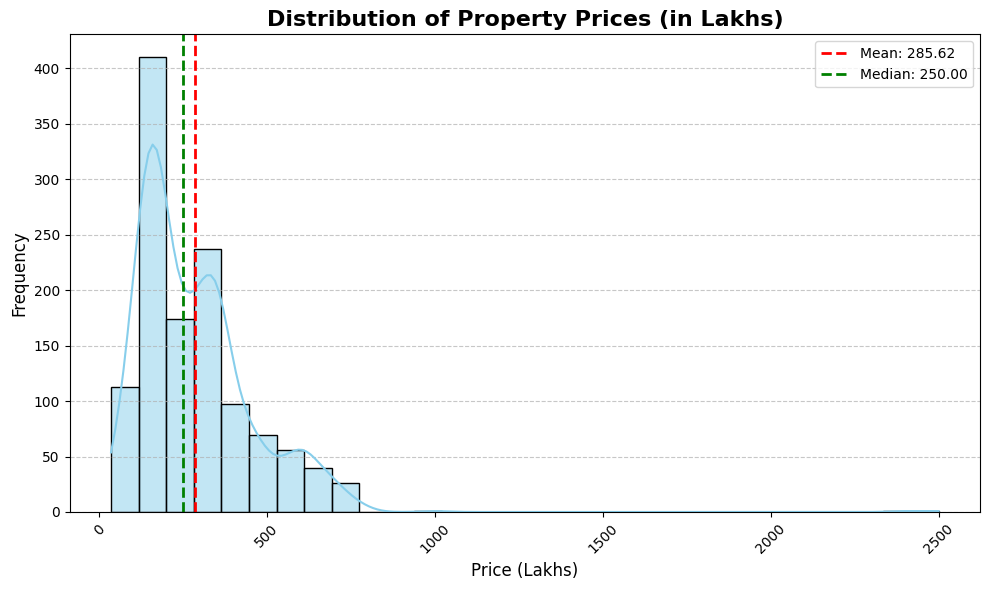

In [55]:

plt.figure(figsize=(10, 6))

sns.histplot(df["new_price"], bins=30, kde=True, color='skyblue', edgecolor='black')

plt.title("Distribution of Property Prices (in Lakhs)", fontsize=16, fontweight='bold')
plt.xlabel("Price (Lakhs)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

mean_price = df["new_price"].mean()
median_price = df["new_price"].median()

plt.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='--', linewidth=2, label=f'Median: {median_price:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

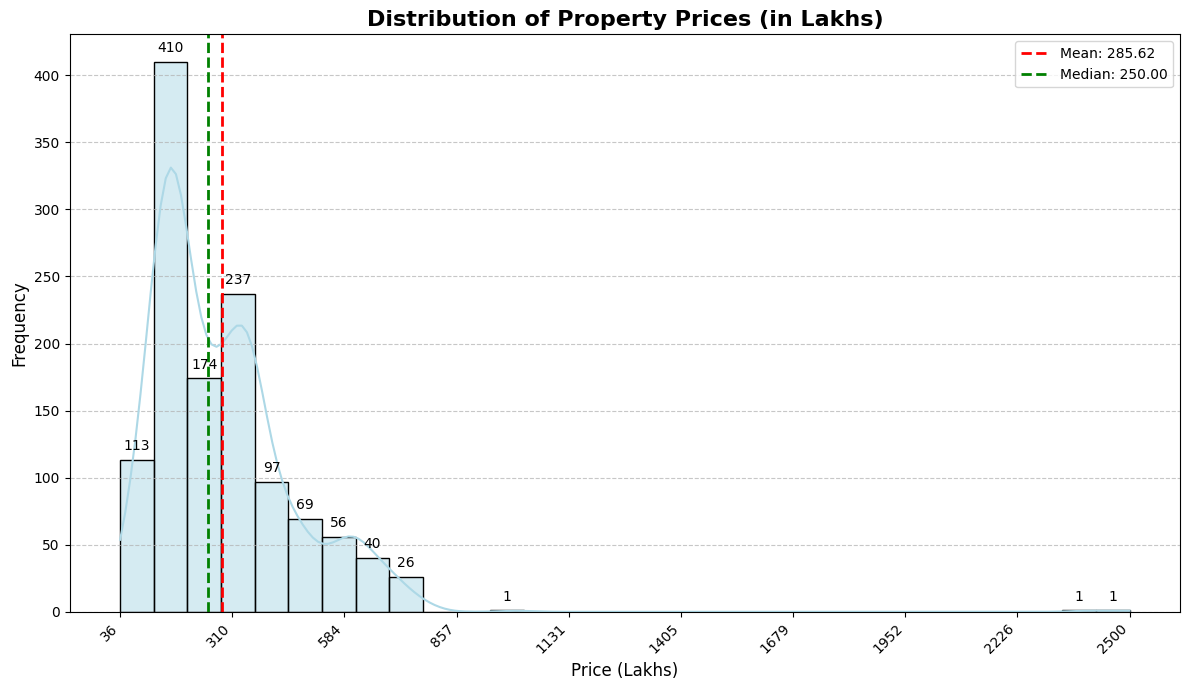

In [56]:
plt.figure(figsize=(12, 7))

ax = sns.histplot(df["new_price"], bins=30, kde=True, color='lightblue', edgecolor='black')

plt.title("Distribution of Property Prices (in Lakhs)", fontsize=16, fontweight='bold')
plt.xlabel("Price (Lakhs)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Adjust x-axis ticks for better readability
xticks = np.linspace(df["new_price"].min(), df["new_price"].max(), 10)
plt.xticks(xticks, rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)

mean_price = df["new_price"].mean()
median_price = df["new_price"].median()

plt.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='--', linewidth=2, label=f'Median: {median_price:.2f}')
plt.legend()

plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    if height > 0: 
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

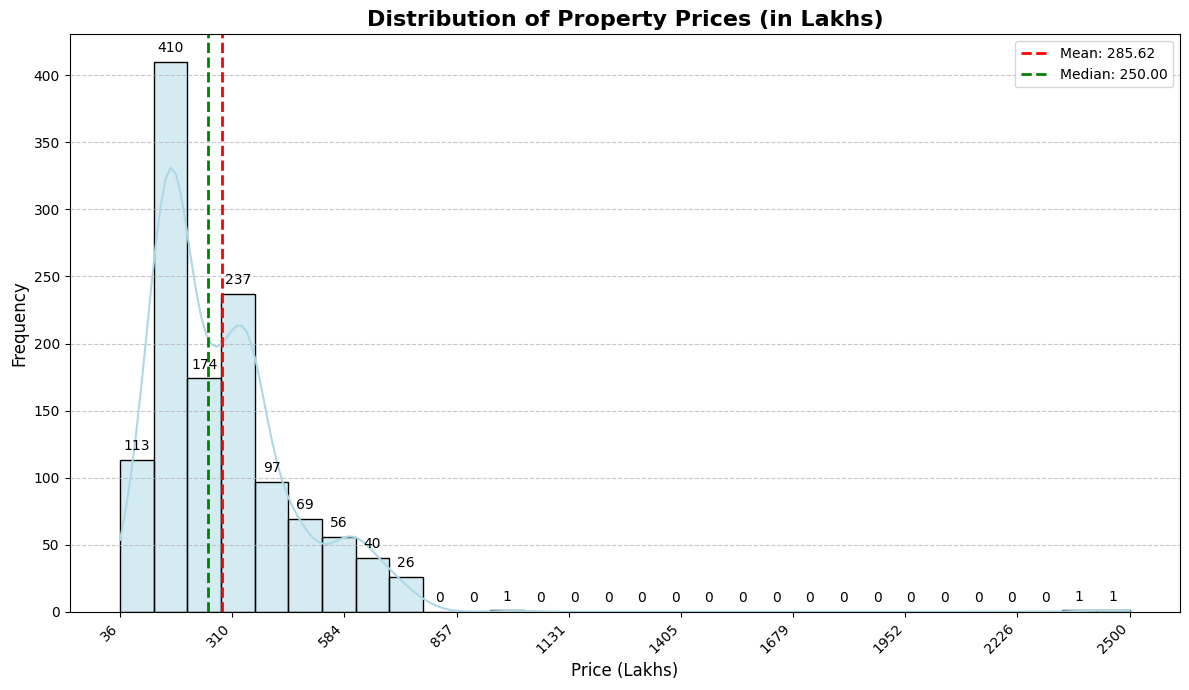

In [57]:


plt.figure(figsize=(12, 7)) 

ax = sns.histplot(df["new_price"], bins=30, kde=True, color='lightblue', edgecolor='black')

plt.title("Distribution of Property Prices (in Lakhs)", fontsize=16, fontweight='bold')
plt.xlabel("Price (Lakhs)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Adjust x-axis ticks for better readability
xticks = np.linspace(df["new_price"].min(), df["new_price"].max(), 10)  
plt.xticks(xticks, rotation=45, ha='right')  

plt.grid(axis='y', linestyle='--', alpha=0.7)

mean_price = df["new_price"].mean()
median_price = df["new_price"].median()

plt.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='--', linewidth=2, label=f'Median: {median_price:.2f}')
plt.legend()

plt.tight_layout()

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

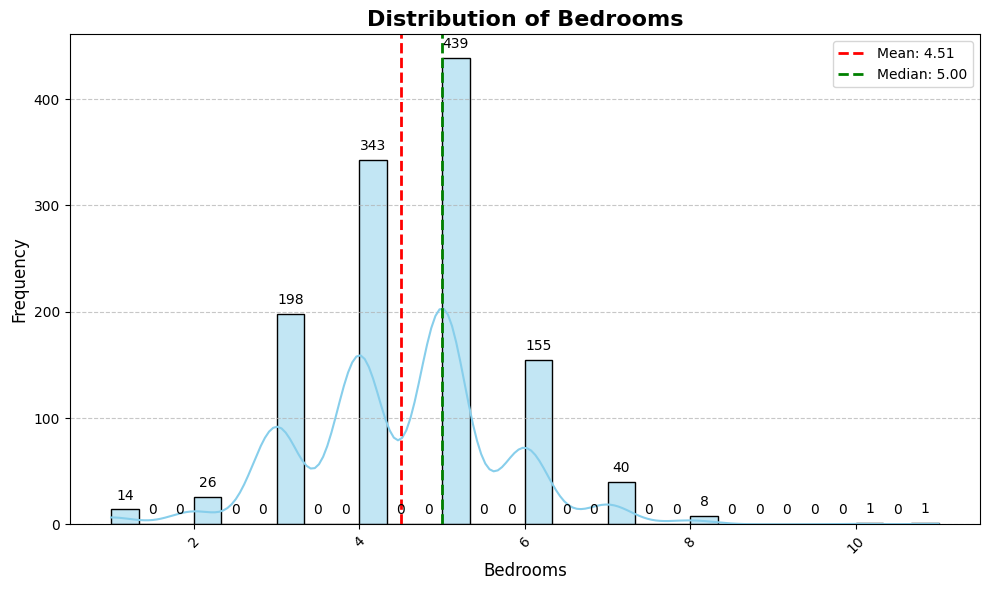

In [58]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(df["bedrooms"], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribution of Bedrooms", fontsize=16, fontweight='bold')
plt.xlabel("Bedrooms", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
mean_bedrooms = df["bedrooms"].mean()
median_bedrooms = df["bedrooms"].median()
plt.axvline(mean_bedrooms, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_bedrooms:.2f}')
plt.axvline(median_bedrooms, color='green', linestyle='--', linewidth=2, label=f'Median: {median_bedrooms:.2f}')
plt.legend()
plt.tight_layout()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

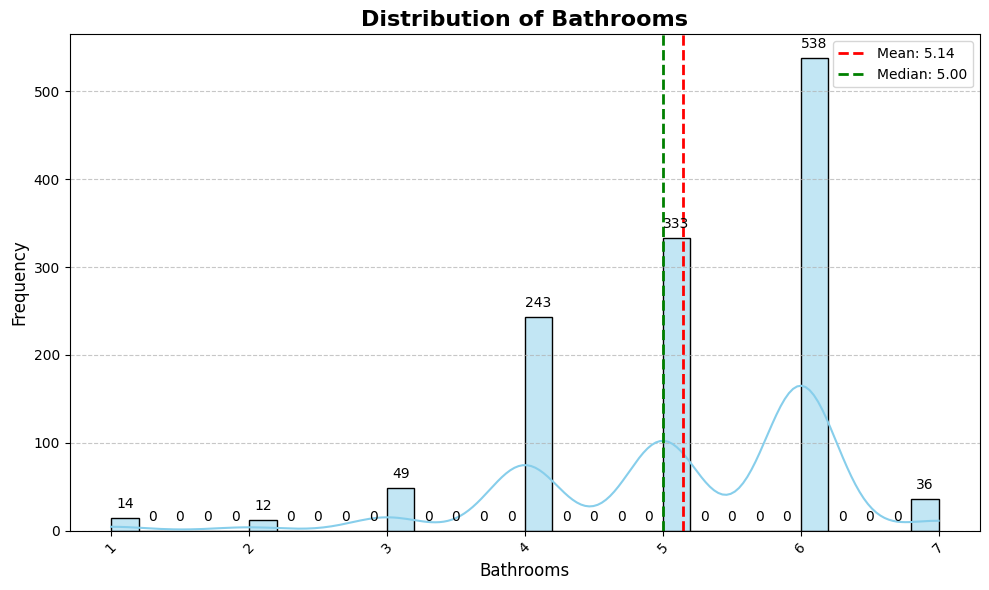

In [59]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(df["bathrooms_int"], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribution of Bathrooms", fontsize=16, fontweight='bold')
plt.xlabel("Bathrooms", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
mean_bathrooms = df["bathrooms_int"].mean()
median_bathrooms = df["bathrooms_int"].median()
plt.axvline(mean_bathrooms, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_bathrooms:.2f}')
plt.axvline(median_bathrooms, color='green', linestyle='--', linewidth=2, label=f'Median: {median_bathrooms:.2f}')
plt.legend()
plt.tight_layout()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()


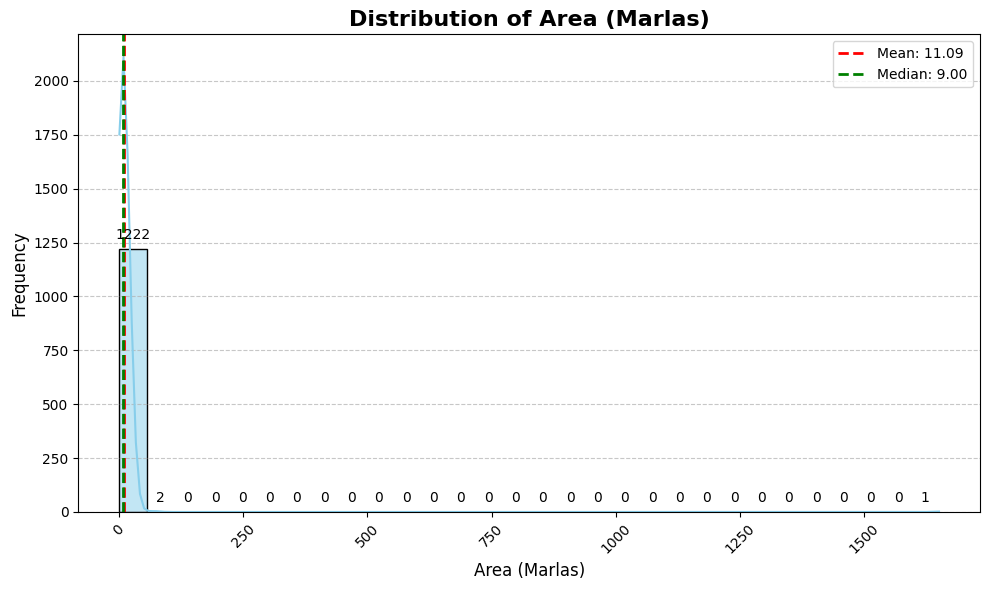

In [60]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(df["area_marlas"], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribution of Area (Marlas)", fontsize=16, fontweight='bold')
plt.xlabel("Area (Marlas)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
mean_area = df["area_marlas"].mean()
median_area = df["area_marlas"].median()
plt.axvline(mean_area, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_area:.2f}')
plt.axvline(median_area, color='green', linestyle='--', linewidth=2, label=f'Median: {median_area:.2f}')
plt.legend()
plt.tight_layout()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

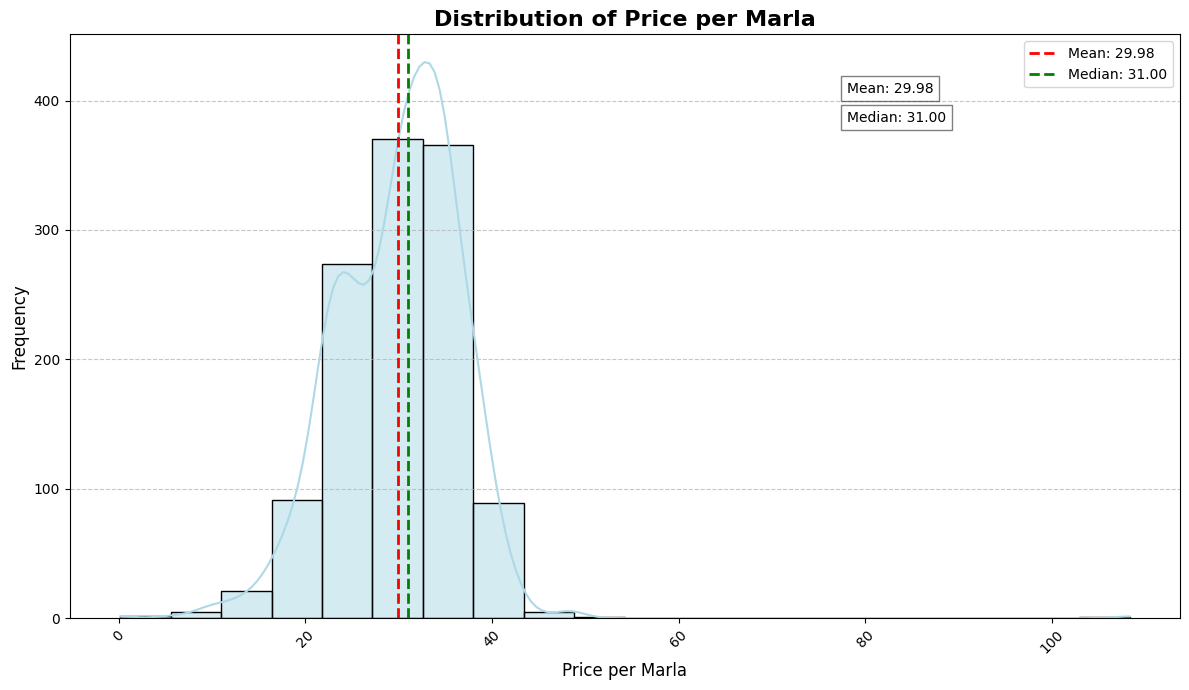

In [61]:
mean_price_per_marla = df['price_per_marla'].mean()
median_price_per_marla = df['price_per_marla'].median()

plt.figure(figsize=(12, 7))  
sns.histplot(df['price_per_marla'], kde=True, bins=20, color='lightblue', edgecolor='black')

plt.axvline(mean_price_per_marla, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_price_per_marla:.2f}')
plt.axvline(median_price_per_marla, color='green', linestyle='--', linewidth=2, label=f'Median: {median_price_per_marla:.2f}')

plt.title('Distribution of Price per Marla', fontsize=16, fontweight='bold')
plt.xlabel('Price per Marla', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  

plt.text(0.7, 0.9, f'Mean: {mean_price_per_marla:.2f}', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.7, 0.85, f'Median: {median_price_per_marla:.2f}', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.legend()

plt.tight_layout() 
plt.show()

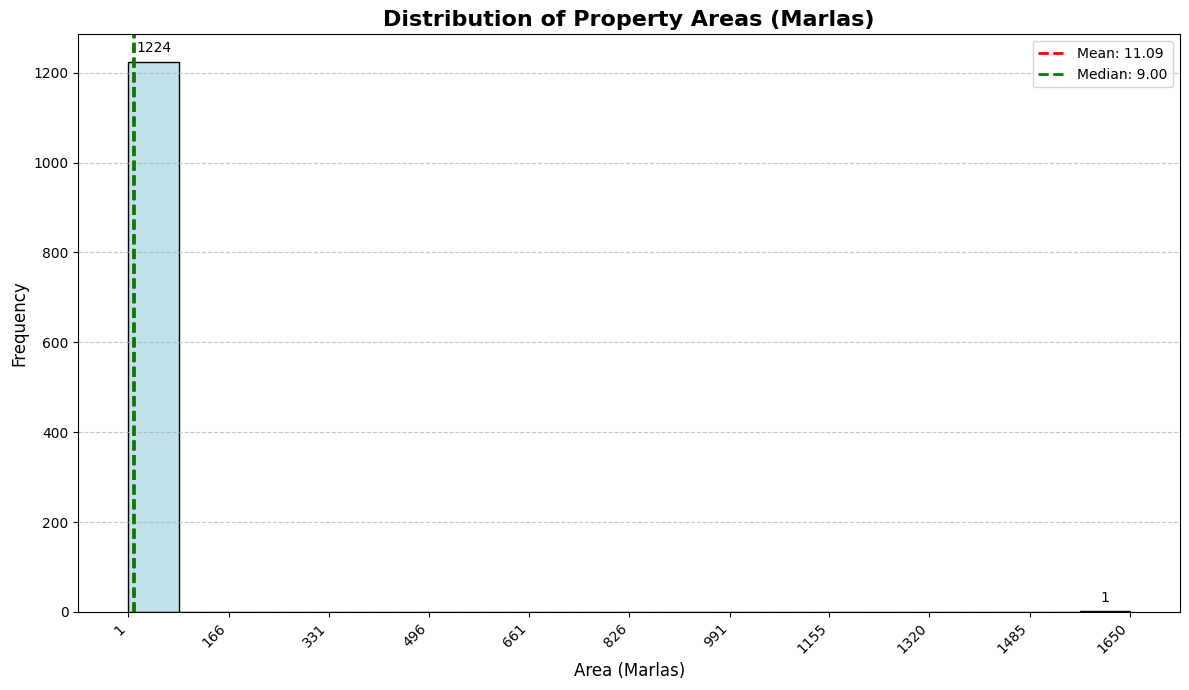

In [62]:
plt.figure(figsize=(12, 7))

ax = sns.histplot(df["area_marlas"], bins=20, kde=False, color='lightblue', edgecolor='black')

plt.title("Distribution of Property Areas (Marlas)", fontsize=16, fontweight='bold')
plt.xlabel("Area (Marlas)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

bin_edges = [p.get_xy()[0] for p in ax.patches]
bin_edges.append(ax.patches[-1].get_xy()[0] + ax.patches[-1].get_width())
bin_edges_rounded = np.round(bin_edges).astype(int)

plt.xticks(bin_edges_rounded[::2], rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)

mean_area = df["area_marlas"].mean()
median_area = df["area_marlas"].median()

plt.axvline(mean_area, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_area:.2f}')
plt.axvline(median_area, color='green', linestyle='--', linewidth=2, label=f'Median: {median_area:.2f}')
plt.legend()

plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

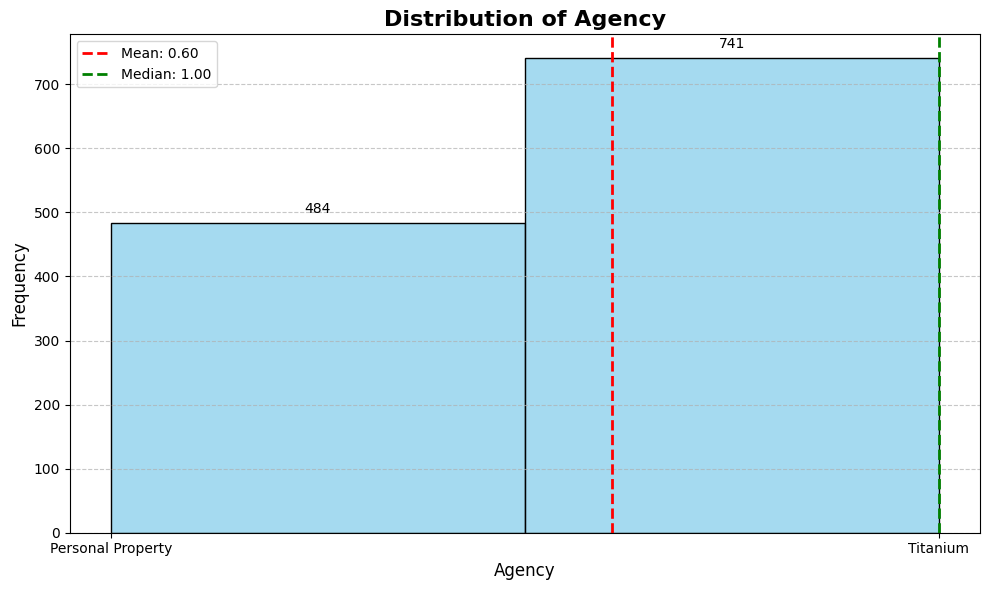

In [63]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(df["agency_int"], bins=2, kde=False, color='skyblue', edgecolor='black') 
plt.title("Distribution of Agency", fontsize=16, fontweight='bold')
plt.xlabel("Agency", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks([0,1], ['Personal Property', 'Titanium']) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
mean_agency = df["agency_int"].mean()
median_agency = df["agency_int"].median()
plt.axvline(mean_agency, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_agency:.2f}')
plt.axvline(median_agency, color='green', linestyle='--', linewidth=2, label=f'Median: {median_agency:.2f}')
plt.legend()
plt.tight_layout()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [64]:
df.describe()

bedrooms  bathrooms_int  area_marlas    new_price  agency_int  \
count  1225.000000         1225.0  1225.000000  1225.000000      1225.0   
mean      4.507755        5.14449    11.091020   285.619118    0.604898   
std       1.193726       1.079906    47.275273   182.271394    0.489072   
min       1.000000            1.0     1.300000    36.000000         0.0   
25%       4.000000            4.0     5.000000   160.000000         0.0   
50%       5.000000            5.0     9.000000   250.000000         1.0   
75%       5.000000            6.0    11.000000   360.000000         1.0   
max      11.000000            7.0  1650.000000  2500.000000         1.0   

       price_per_marla  
count      1225.000000  
mean         29.977874  
std           6.774185  
min           0.145455  
25%          25.000000  
50%          31.000000  
75%          34.545455  
max         108.333333

In [65]:
df.head()

location  \
0                        New Shalimar Colony, Multan   
1                DHA Phase 1 - Sector H, DHA Phase 1   
2  Buch Executive Villas Extension, Buch Executiv...   
3                      Buch Executive Villas, Multan   
4                            DHA Villas, DHA Defence   

                                                link  bedrooms  bathrooms_int  \
0  https://www.zameen.com/Property/multan_new_sha...       3.0              4   
1  https://www.zameen.com/Property/dha_phase_1_dh...       7.0              6   
2  https://www.zameen.com/Property/buch_executive...       6.0              6   
3  https://www.zameen.com/Property/multan_buch_ex...       4.0              6   
4  https://www.zameen.com/Property/dha_defence_dh...       3.0              3   

   area_marlas  new_price  agency_int  price_per_marla  
0          4.0      120.0           0        30.000000  
1         20.0      420.0           0        21.000000  
2          8.3      320.0           0        38.554217  
3          5.0      195.0           0        39.000000  
4          5.0      200.0           0        40.000000

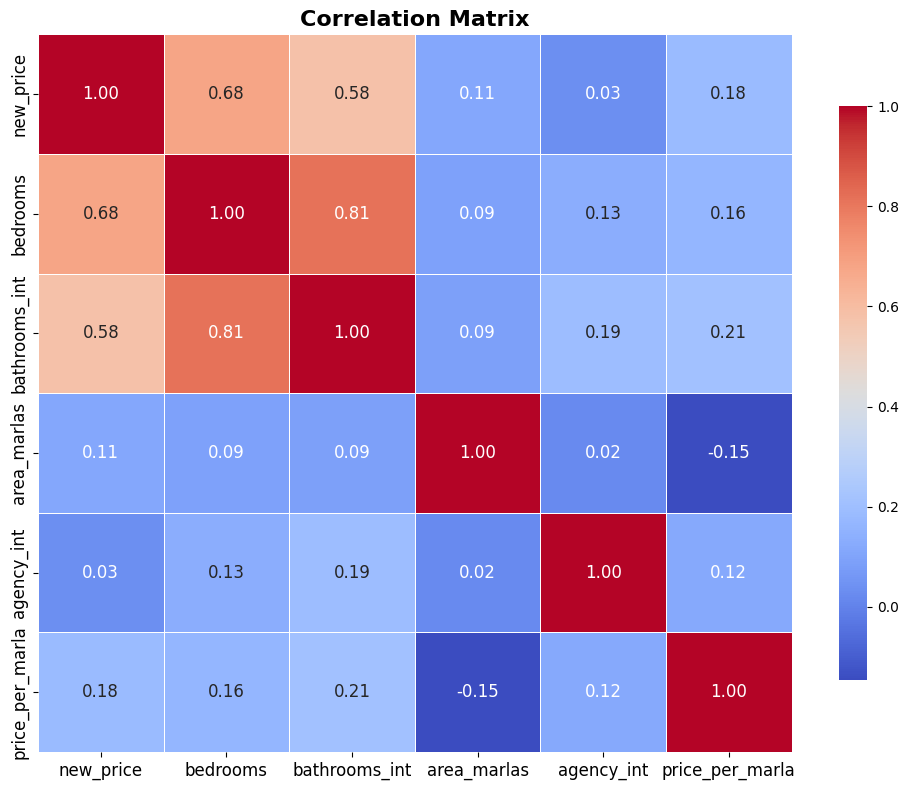

In [66]:
df_selected = df[['new_price', 'bedrooms', 'bathrooms_int', 'area_marlas', 'agency_int', 'price_per_marla']]

correlation_matrix = df_selected.corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',  
            fmt=".2f",
            linewidths=.5,  
            cbar_kws={"shrink": .8},  
            annot_kws={"size": 12})  

plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_8508\831711456.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='agency_int', y='new_price', data=df,


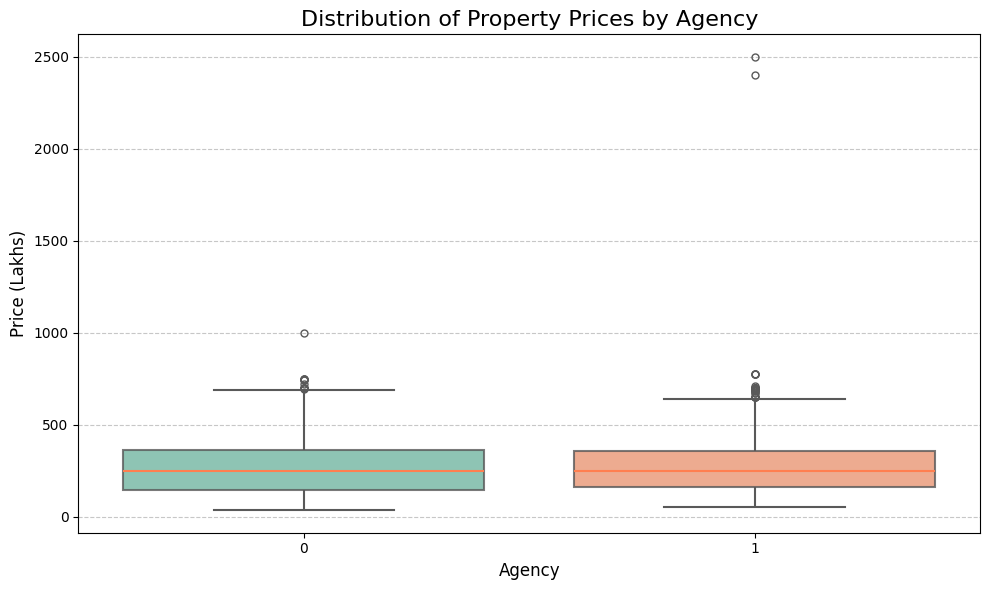

In [67]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='agency_int', y='new_price', data=df,
            palette='Set2', 
            linewidth=1.5,  
            fliersize=5,  
            notch=False,   
            boxprops=dict(alpha=.8),  
            medianprops=dict(color="coral"), 
            )

plt.title("Distribution of Property Prices by Agency", fontsize=16)
plt.xlabel("Agency", fontsize=12)
plt.ylabel("Price (Lakhs)", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.tight_layout() 
plt.show()

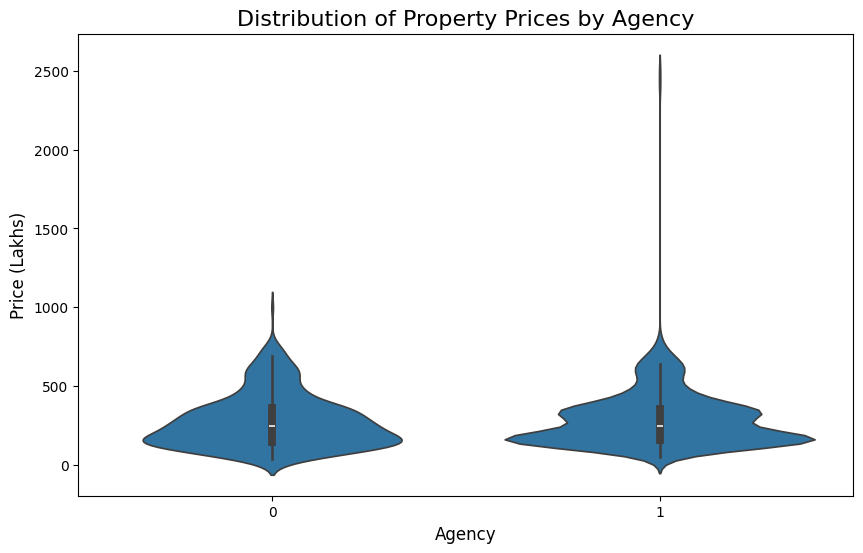

In [68]:
plt.figure(figsize=(10, 6))

sns.violinplot(x='agency_int', y='new_price', data=df) #or agency_int

plt.title("Distribution of Property Prices by Agency", fontsize=16)
plt.xlabel("Agency", fontsize=12)
plt.ylabel("Price (Lakhs)", fontsize=12)

plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_8508\1595725914.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='agency_int', y='new_price', data=df,
C:\Users\hp\AppData\Local\Temp\ipykernel_8508\1595725914.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='agency_int', y='new_price', data=df,


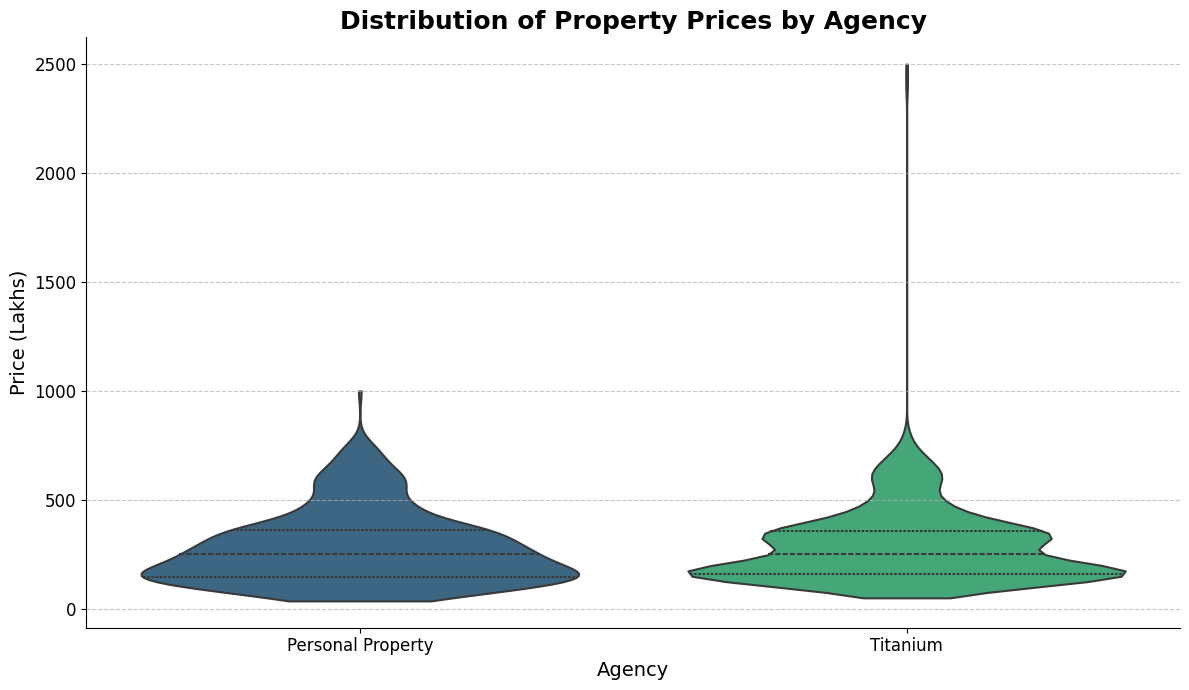

In [69]:
plt.figure(figsize=(12, 7))  # Increase figure size

sns.violinplot(x='agency_int', y='new_price', data=df,
               palette='viridis',  
               inner='quartile',  
               linewidth=1.5,  
               cut=0,  
               scale='count')  

plt.title("Distribution of Property Prices by Agency", fontsize=18, fontweight='bold')
plt.xlabel("Agency", fontsize=14)
plt.ylabel("Price (Lakhs)", fontsize=14)
plt.xticks([0, 1], ['Personal Property', 'Titanium'], fontsize=12)  
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

sns.despine()

plt.tight_layout()
plt.show()

1. Identify High-Value Agencies:

Titanium: This agency shows a higher median property price and a wider distribution, indicating the presence of very high-value properties and a broader range of prices.
Personal Property: While it also has a range of prices, its median and overall distribution are lower than Titanium.

2. Understand Price Variations in Specific Agencies:

Titanium: Exhibits a wider price range, indicating a variety of properties with different values. The large outlier suggests the presence of very expensive properties.
Personal Property: Shows a more concentrated price distribution, suggesting less variation in property values.

3. Inform Pricing Strategies:

Premium Pricing: For properties listed with Titanium, a premium pricing strategy could be justified due to the higher market values and the presence of high-end properties.
Competitive Pricing: For properties listed with Personal Property, a more competitive pricing strategy might be necessary to attract buyers.
Outlier Analysis: The large outlier in Titanium requires further investigation. It could represent a unique luxury property or a data error. If it's a legitimate property, it could set a precedent for high-end pricing in that agency.

4. Investigate Outliers:

as these are different places so.....

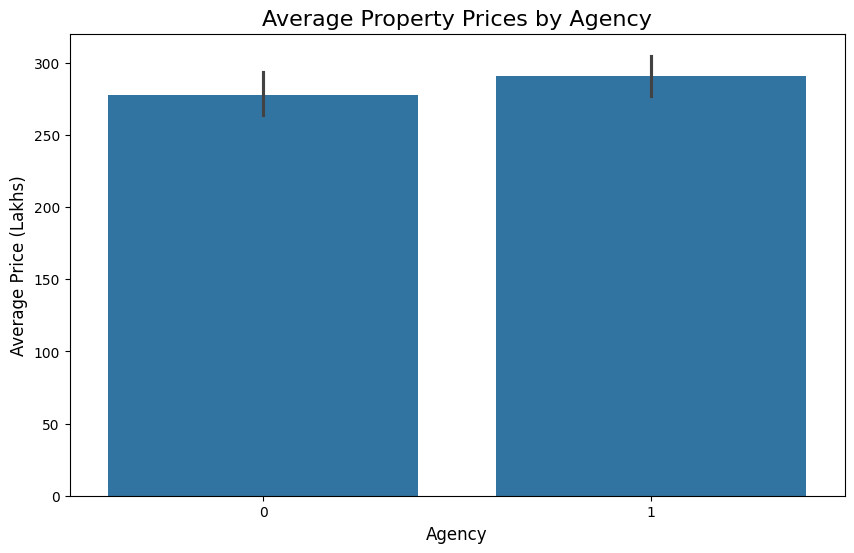

In [70]:
plt.figure(figsize=(10, 6))

sns.barplot(x='agency_int', y='new_price', data=df) 

plt.title("Average Property Prices by Agency", fontsize=16)
plt.xlabel("Agency", fontsize=12)
plt.ylabel("Average Price (Lakhs)", fontsize=12)

plt.show()

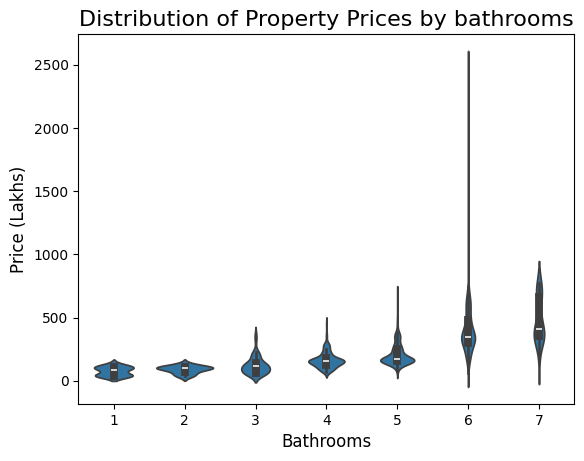

In [71]:
sns.violinplot(x='bathrooms_int', y='new_price', data=df) 

plt.title("Distribution of Property Prices by bathrooms", fontsize=16)
plt.xlabel("Bathrooms", fontsize=12)
plt.ylabel("Price (Lakhs)", fontsize=12)

plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_8508\2969500808.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bathrooms_int', y='new_price', data=df,
C:\Users\hp\AppData\Local\Temp\ipykernel_8508\2969500808.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='bathrooms_int', y='new_price', data=df,


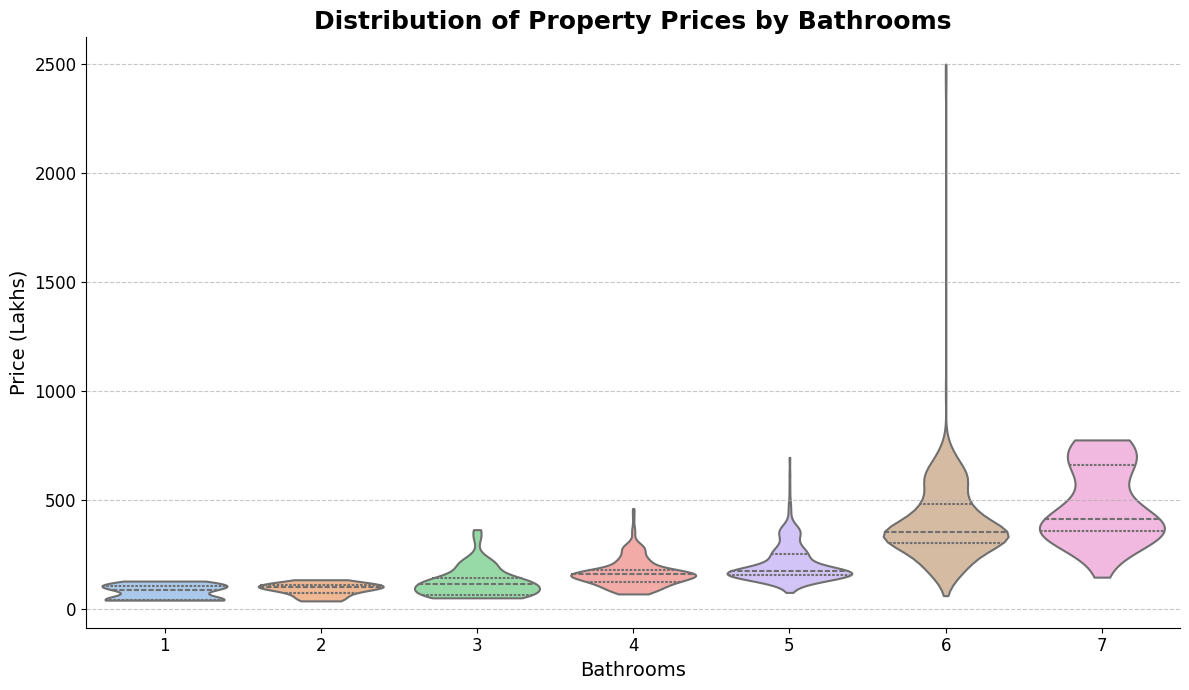

In [72]:
plt.figure(figsize=(12, 7))  

sns.violinplot(x='bathrooms_int', y='new_price', data=df,
               palette='pastel',  
               inner='quartile',  
               linewidth=1.5,  
               cut=0, 
               scale='count')  

plt.title("Distribution of Property Prices by Bathrooms", fontsize=18, fontweight='bold')
plt.xlabel("Bathrooms", fontsize=14)
plt.ylabel("Price (Lakhs)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

sns.despine()

plt.tight_layout()
plt.show()

1. Identify Bathrooms:

6 Bathrooms: This category clearly shows the highest median price and a significant spread, indicating the presence of very high-value properties.
7 Bathrooms: Also exhibits a relatively high median price and a wide distribution.
5 Bathrooms: Shows a trend of higher prices compared to the lower bathroom counts.

2. Understand Price Variations in Specific Areas (Bathrooms):

1 to 4 Bathrooms: These categories have relatively narrow price ranges, suggesting less variation.
5 to 7 Bathrooms: These categories show increasing price ranges, indicating a wider variety of property types and values.
6 Bathrooms: shows a very large outlier.

3. Inform Pricing Strategies:

Premium Pricing: Properties with 6 and 7 bathrooms can command premium prices due to their higher market value.
Tiered Pricing: A tiered pricing strategy based on the number of bathrooms could be implemented, with higher prices for properties with more bathrooms.
Market Segmentation: The plot suggests that there might be distinct market segments for properties with different numbers of bathrooms.

4. Investigate Outliers:

6 Bathrooms: This category shows a significant outlier at the top of the price range. This could represent a unique luxury property.
Other Categories: There are some slight extensions of the violins, but the 6-bathroom category is the most pronounced.

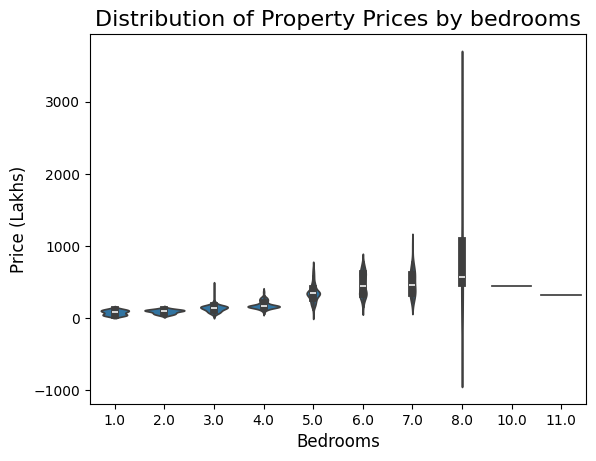

In [73]:
sns.violinplot(x='bedrooms', y='new_price', data=df) 

plt.title("Distribution of Property Prices by bedrooms", fontsize=16)
plt.xlabel("Bedrooms", fontsize=12)
plt.ylabel("Price (Lakhs)", fontsize=12)

plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_8508\2738238391.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bedrooms', y='new_price', data=df,
C:\Users\hp\AppData\Local\Temp\ipykernel_8508\2738238391.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='bedrooms', y='new_price', data=df,


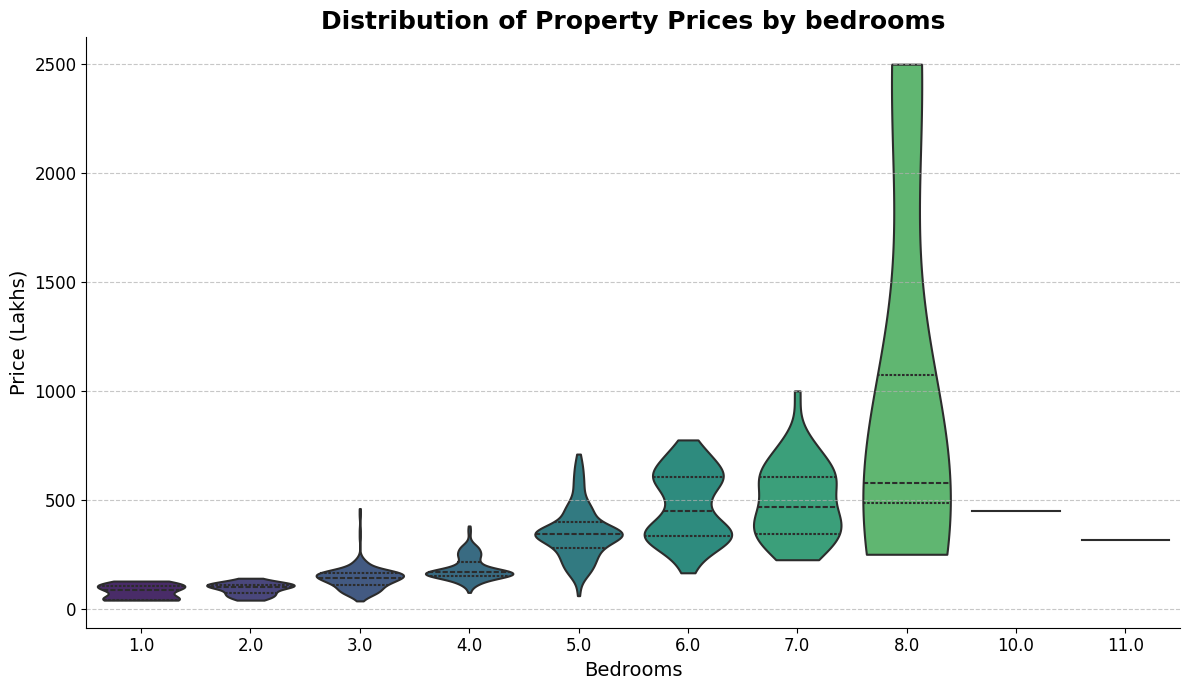

In [74]:
plt.figure(figsize=(12, 7))  

sns.violinplot(x='bedrooms', y='new_price', data=df,
               palette='viridis',  
               inner='quartile',  
               linewidth=1.5,  
               cut=0,  
               scale='count')  

plt.title("Distribution of Property Prices by bedrooms", fontsize=18, fontweight='bold')
plt.xlabel("Bedrooms", fontsize=14)
plt.ylabel("Price (Lakhs)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

sns.despine()

plt.tight_layout()
plt.show()

1. Identify Bedrooms:

8 Bedrooms: This category shows the highest median price and a significant spread, indicating the presence of very high-value properties.
7 Bedrooms: Also exhibits a relatively high median price and a wide distribution.
6 Bedrooms: Shows a trend of higher prices compared to the lower bedroom counts.

2. Understand Price Variations in Specific Areas (Bedrooms):

1 to 4 Bedrooms: These categories have relatively narrow price ranges, suggesting less variation.
5 to 8 Bedrooms: These categories show increasing price ranges, indicating a wider variety of property types and values.
10 and 11 Bedrooms: These categories have a very narrow price distribution, and show that they are very similar in price.

3. Inform Pricing Strategies:

Premium Pricing: Properties with 7 and 8 bedrooms can command premium prices due to their higher market value.
Tiered Pricing: A tiered pricing strategy based on the number of bedrooms could be implemented, with higher prices for properties with more bedrooms.
Market Segmentation: The plot suggests that there might be distinct market segments for properties with different numbers of bedrooms.

4. Investigate Outliers:

8 Bedrooms: This category shows a significant outlier at the top of the price range. This could represent a unique luxury property.
10 and 11 Bedrooms: These categories have a very limited price range, and should be investigated to see if there is a reason for this.
Other Categories: There are some slight extensions of the violins, but the 8-bedroom category is the most pronounced.

C:\Users\hp\AppData\Local\Temp\ipykernel_8508\1557424242.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='area_marlas', y='new_price', data=df,
C:\Users\hp\AppData\Local\Temp\ipykernel_8508\1557424242.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='area_marlas', y='new_price', data=df,


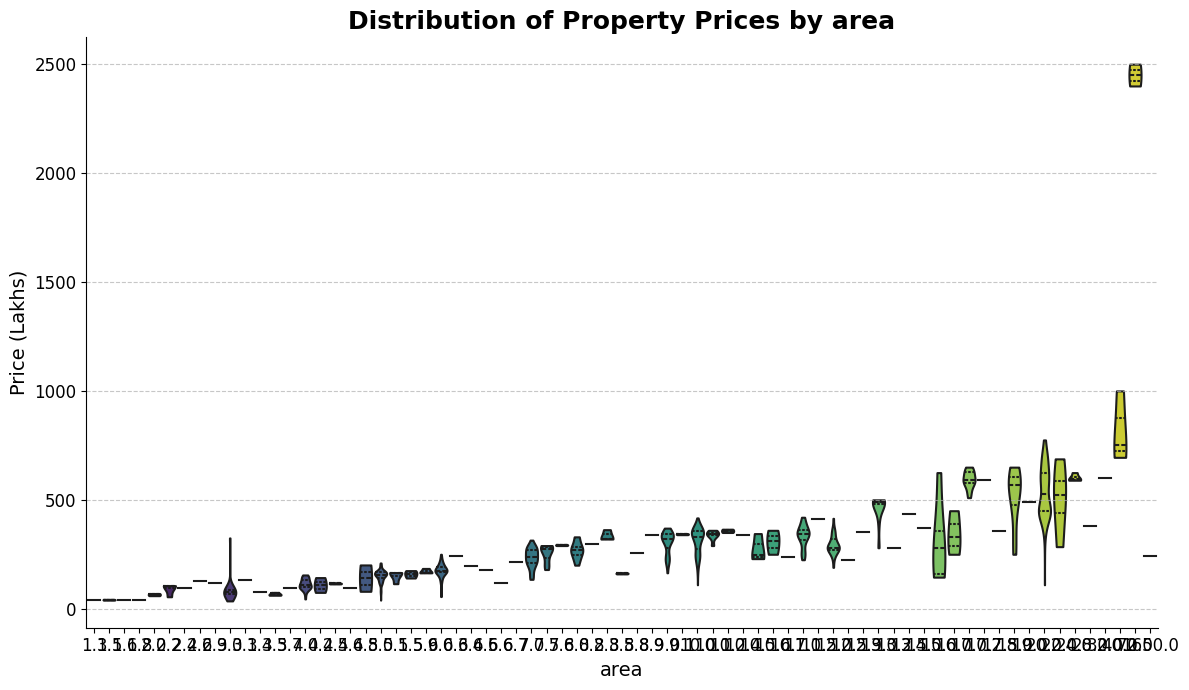

In [75]:
plt.figure(figsize=(12, 7)) 

sns.violinplot(x='area_marlas', y='new_price', data=df,
               palette='viridis',  
               inner='quartile',  
               linewidth=1.5,  
               cut=0,  
               scale='count')  

plt.title("Distribution of Property Prices by area", fontsize=18, fontweight='bold')
plt.xlabel("area", fontsize=14)
plt.ylabel("Price (Lakhs)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

sns.despine()

plt.tight_layout()
plt.show()

In [76]:
df["area_marlas"].unique()

array([4.00e+00, 2.00e+01, 8.30e+00, 5.00e+00, 1.10e+01, 1.00e+01,
       6.00e+00, 1.30e+01, 3.00e+00, 1.50e+01, 2.40e+01, 5.10e+00,
       7.00e+00, 9.00e+00, 1.20e+01, 6.50e+00, 1.01e+01, 1.70e+01,
       8.50e+00, 4.00e+01, 1.05e+01, 1.80e+01, 8.00e+00, 7.50e+00,
       5.50e+00, 1.06e+01, 7.60e+00, 4.50e+00, 4.20e+00, 1.72e+01,
       3.70e+00, 1.90e+01, 1.60e+01, 3.40e+00, 2.20e+01, 1.30e+00,
       3.20e+01, 1.29e+01, 2.40e+00, 2.90e+00, 1.15e+01, 1.04e+01,
       1.50e+00, 2.20e+00, 2.00e+00, 3.50e+00, 6.40e+00, 1.02e+01,
       9.10e+00, 6.30e+00, 7.20e+01, 1.75e+01, 1.40e+01, 1.07e+01,
       1.65e+03, 2.80e+01, 4.80e+00, 4.60e+00, 6.70e+00, 6.60e+00,
       5.90e+00, 3.10e+00, 1.32e+01, 8.20e+00, 2.60e+00, 1.80e+00,
       8.80e+00, 1.60e+00, 1.35e+01, 8.90e+00, 1.25e+01])

In [77]:

top_15_areas = df['area_marlas'].value_counts().nlargest(15).index

df_top_15 = df[df['area_marlas'].isin(top_15_areas)]

C:\Users\hp\AppData\Local\Temp\ipykernel_8508\2621942675.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='area_marlas', y='new_price', data=df_top_15,
C:\Users\hp\AppData\Local\Temp\ipykernel_8508\2621942675.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='area_marlas', y='new_price', data=df_top_15,


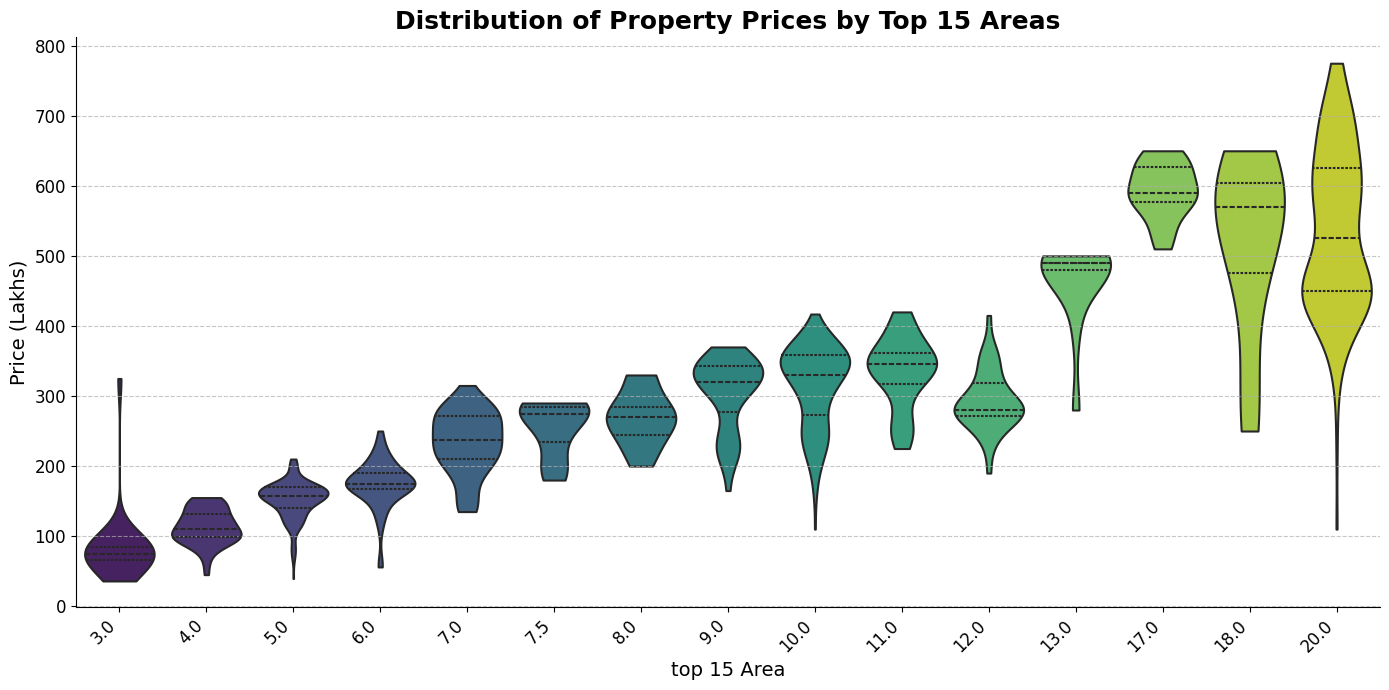

In [78]:
plt.figure(figsize=(14, 7)) 

sns.violinplot(x='area_marlas', y='new_price', data=df_top_15,
               palette='viridis', 
               inner='quartile',  
               linewidth=1.5, 
               cut=0,  
               scale='count')  

plt.title("Distribution of Property Prices by Top 15 Areas", fontsize=18, fontweight='bold')
plt.xlabel("top 15 Area", fontsize=14)
plt.ylabel("Price (Lakhs)", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12) 
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

sns.despine()

plt.tight_layout()
plt.show()

1. Identify High-Value Areas:

20.0: This area clearly shows the highest median property price and a concentration of higher-priced properties.
18.0 & 17.0: These areas also exhibit relatively high median prices compared to the others.
Areas with higher numbers such as 13.0 and 12.0 also show a trend of higher prices than the lower numbers.

2. Understand Price Variations in Specific Areas:

3.0 & 4.0: These areas show a narrow price range, indicating less variation.
20.0: This area has a wider price distribution, suggesting a mix of property types and values.
Other areas: The violin plots show varying degrees of price spread, indicating different levels of price variation within each area.

3. Inform Pricing Strategies:

Premium Pricing: For properties in areas 20.0, 18.0, and 17.0, a premium pricing strategy is likely justified due to the higher market values.
Competitive Pricing: In areas with narrower price ranges (e.g., 3.0, 4.0), a more competitive pricing strategy might be necessary.
Tiered Pricing: Based on the varying price distributions, a tiered pricing strategy could be implemented, offering different price points for different types of properties within each area.

4. Investigate Outliers:

3.0: This area shows a single outlier at the top of the price range.After some investigation we determined it  as unique area because of different locations.
Other Areas: While there are some slight extensions of the violins, the area 3.0 is the most pronounced.
It is worth noting that the graph is cut off at 800 price (Lakhs), so there could be outliers.

In [79]:
df.head()

location  \
0                        New Shalimar Colony, Multan   
1                DHA Phase 1 - Sector H, DHA Phase 1   
2  Buch Executive Villas Extension, Buch Executiv...   
3                      Buch Executive Villas, Multan   
4                            DHA Villas, DHA Defence   

                                                link  bedrooms  bathrooms_int  \
0  https://www.zameen.com/Property/multan_new_sha...       3.0              4   
1  https://www.zameen.com/Property/dha_phase_1_dh...       7.0              6   
2  https://www.zameen.com/Property/buch_executive...       6.0              6   
3  https://www.zameen.com/Property/multan_buch_ex...       4.0              6   
4  https://www.zameen.com/Property/dha_defence_dh...       3.0              3   

   area_marlas  new_price  agency_int  price_per_marla  
0          4.0      120.0           0        30.000000  
1         20.0      420.0           0        21.000000  
2          8.3      320.0           0        38.554217  
3          5.0      195.0           0        39.000000  
4          5.0      200.0           0        40.000000

C:\Users\hp\AppData\Local\Temp\ipykernel_8508\2666017250.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='location', y='new_price', data=df_top_15,
C:\Users\hp\AppData\Local\Temp\ipykernel_8508\2666017250.py:7: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='location', y='new_price', data=df_top_15,


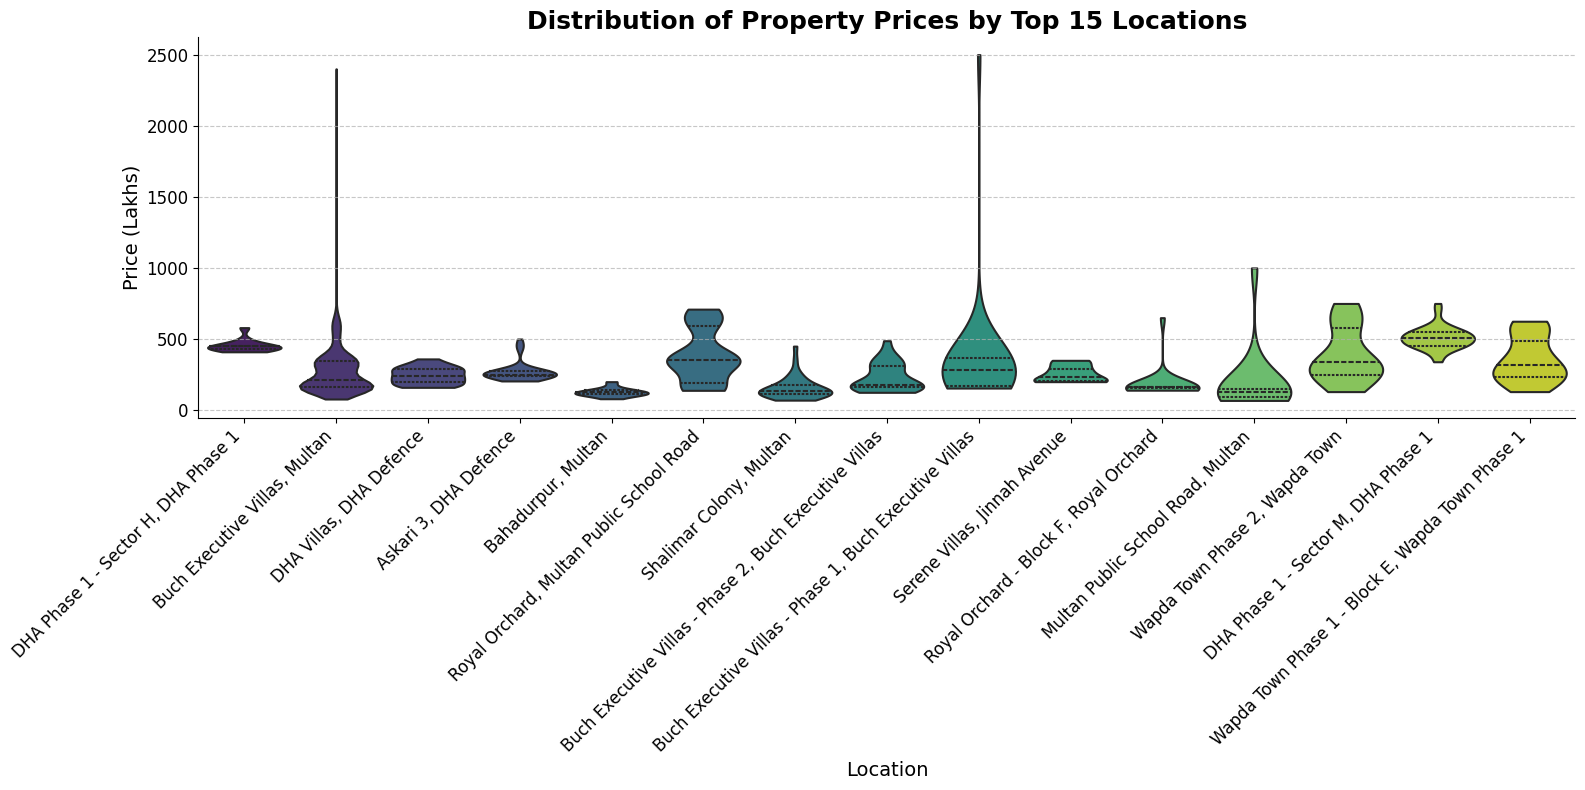

In [80]:
top_15_locations = df['location'].value_counts().nlargest(15).index

df_top_15 = df[df['location'].isin(top_15_locations)]

plt.figure(figsize=(16, 8))  

sns.violinplot(x='location', y='new_price', data=df_top_15,
               palette='viridis',  
               inner='quartile',  
               linewidth=1.5,  
               cut=0,  
               scale='count')  

plt.title("Distribution of Property Prices by Top 15 Locations", fontsize=18, fontweight='bold')
plt.xlabel("Location", fontsize=14)
plt.ylabel("Price (Lakhs)", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)  

plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

sns.despine()

plt.tight_layout()
plt.show()

DHA Locations: Locations within DHA (Defence Housing Authority) tend to have higher median prices and a wider spread, indicating a mix of property types and price ranges.

Buch Executive Villas: This location shows a large outlier.

Wapda Town: Locations within Wapda Town show a more varied price distribution.

Royal Orchard and Multan Public School Road: These locations show a more concentrated price distribution.

1. Identify High-Value Locations:

DHA Phase 1 (various sectors): Locations within DHA (Defence Housing Authority) generally show higher median prices and a wider distribution, suggesting a mix of high-value properties.
Buch Executive Villas: This location shows a particularly high outlier, indicating the presence of very expensive properties.

2. Understand Price Variations in Specific Areas:

DHA Locations: Prices vary significantly, suggesting a range of property sizes and types within the DHA.
Wapda Town: Prices also show some variation, but generally fall within a more moderate range.
Royal Orchard and Multan Public School Road: These locations exhibit a more concentrated price distribution, indicating less variation.
Buch Executive Villas: shows a very large range of prices, and a very large outlier.

3. Inform Pricing Strategies:

Premium Pricing: For properties in DHA locations, a premium pricing strategy could be justified due to the higher market value.
Competitive Pricing: In locations like Wapda Town, a more competitive pricing strategy might be necessary to attract buyers.
Outlier Analysis: The large outlier in Buch Executive Villas requires further analysis. It could represent a unique luxury property or a data error. If it's a legitimate property, it could set a precedent for high-end pricing in that area.

4. Investigate Outliers:

Buch Executive Villas: The single property with an extremely high price in this location needs investigation. this is unique property there
Other Outliers: While less extreme, other locations also show outliers. These could be due to factors like property size, condition, or unique features. 


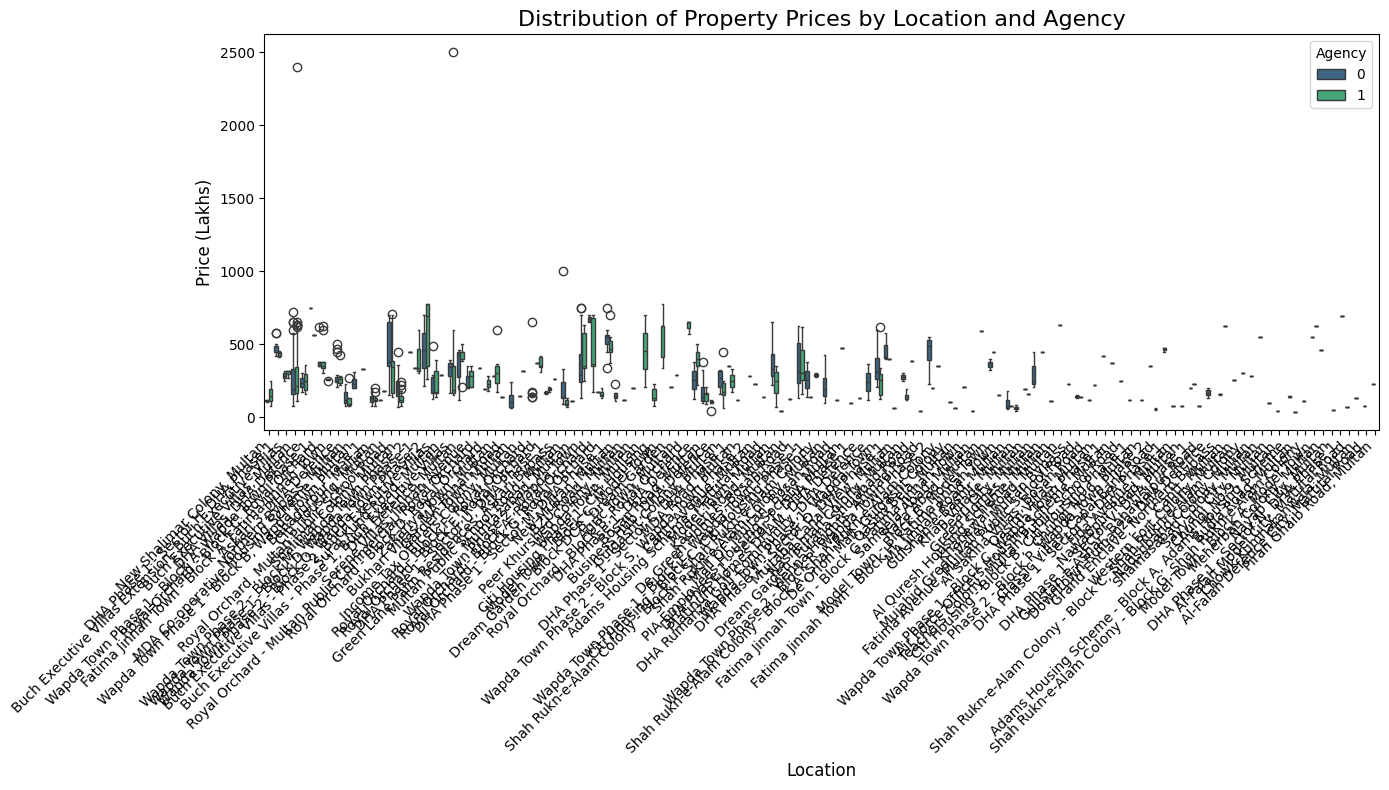

In [81]:
plt.figure(figsize=(14, 8))  

sns.boxplot(x='location', y='new_price', hue='agency_int', data=df, palette='viridis')

plt.title("Distribution of Property Prices by Location and Agency", fontsize=16)
plt.xlabel("Location", fontsize=12)
plt.ylabel("Price (Lakhs)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.legend(title='Agency')

plt.tight_layout()
plt.show()

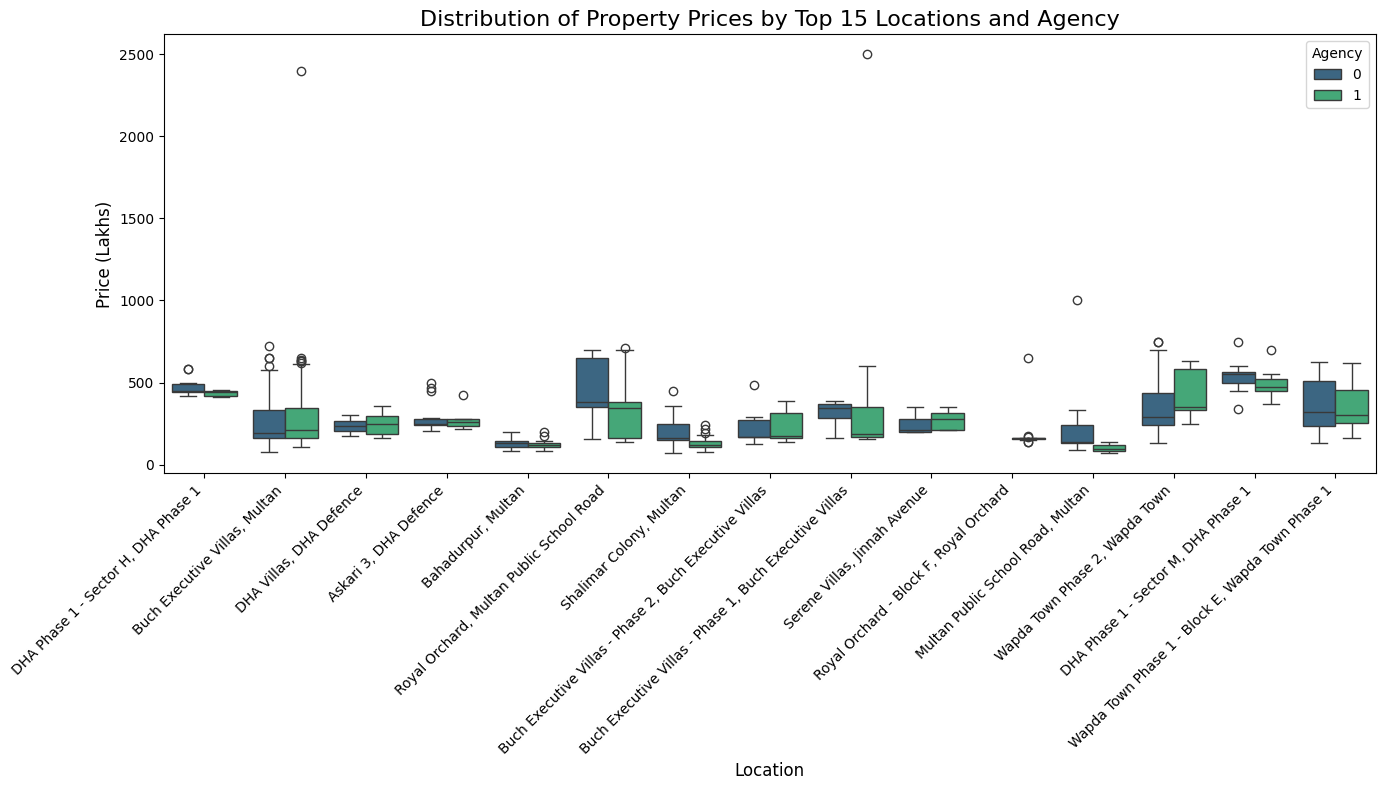

In [82]:
top_15_locations = df['location'].value_counts().nlargest(15).index

df_top_15 = df[df['location'].isin(top_15_locations)]

plt.figure(figsize=(14, 8)) 

sns.boxplot(x='location', y='new_price', hue='agency_int', data=df_top_15, palette='viridis')

plt.title("Distribution of Property Prices by Top 15 Locations and Agency", fontsize=16)
plt.xlabel("Location", fontsize=12)
plt.ylabel("Price (Lakhs)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.legend(title='Agency')

plt.tight_layout()
plt.show()

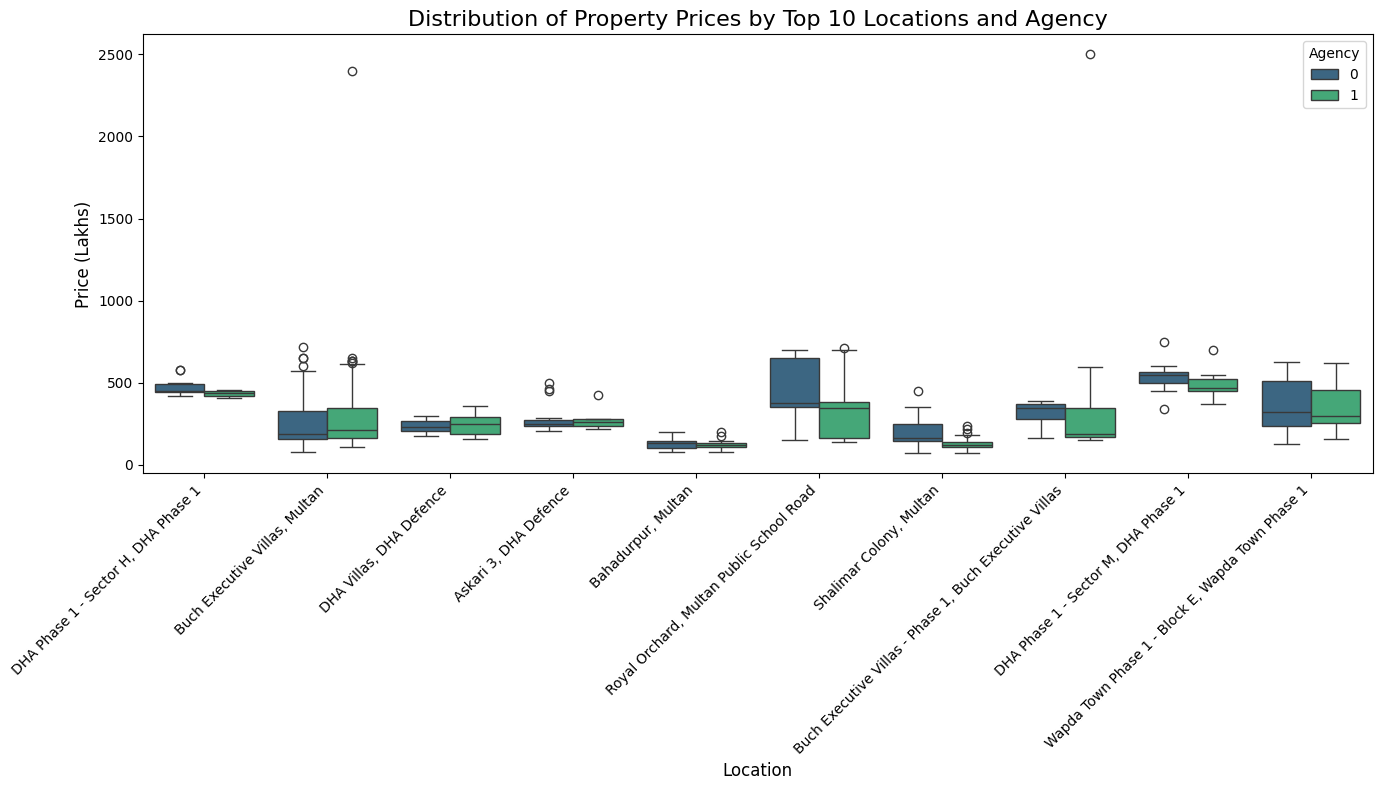

In [83]:
top_10_locations = df['location'].value_counts().nlargest(10).index

df_top_10 = df[df['location'].isin(top_10_locations)]

plt.figure(figsize=(14, 8))  

sns.boxplot(x='location', y='new_price', hue='agency_int', data=df_top_10, palette='viridis')

plt.title("Distribution of Property Prices by Top 10 Locations and Agency", fontsize=16)
plt.xlabel("Location", fontsize=12)
plt.ylabel("Price (Lakhs)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.legend(title='Agency')

plt.tight_layout()
plt.show()

Significant Price Variation Across Locations: The box plot clearly demonstrates a wide range of property prices across the top 10 locations. Notably, "Royal Orchard, Multan Public School Road" and "DHA Phase 1 - Sector M, DHA Phase 1" show a higher median and wider distribution of prices compared to locations like "Bahadurpur, Multan" or "Shalimar Colony, Multan." This suggests substantial differences in property value depending on the specific neighborhood.

Agency Influence on Price Distribution: The "Agency" hue in the box plot reveals potential differences in pricing strategies or property types between the two agencies (represented by 0 and 1). In some locations, such as "Royal Orchard, Multan Public School Road," there's a clear separation in price distributions between the agencies, indicating possible differences in the types of properties they handle or their pricing approaches.

Presence of Outliers: Several locations exhibit outliers, particularly in the higher price range. These outliers suggest the presence of properties with significantly higher prices than the typical range for those areas. Understanding the nature of these outliers (e.g., larger plots, luxury homes) could provide valuable insights into the high-end property market in Multan.

Median Price Differences: Examining the median lines within the boxes reveals differences in the typical property prices across locations. For instance, "DHA Phase 1 - Sector H, DHA Phase 1" and "Buch Executive Villas, Multan" have relatively higher median prices compared to "Askari 3, DHA Defence" or "Bahadurpur, Multan." This highlights the importance of location as a key factor influencing property valuation in Multan.

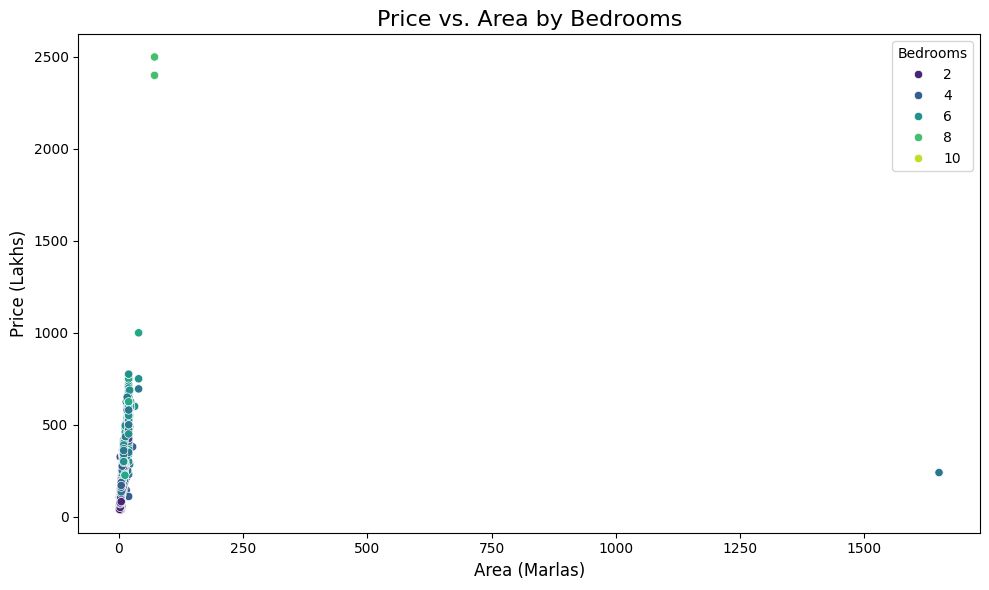

In [84]:
plt.figure(figsize=(10, 6))  

sns.scatterplot(x='area_marlas', y='new_price', hue='bedrooms', data=df, palette='viridis')

plt.title("Price vs. Area by Bedrooms", fontsize=16)
plt.xlabel("Area (Marlas)", fontsize=12)
plt.ylabel("Price (Lakhs)", fontsize=12)
plt.legend(title='Bedrooms')

plt.tight_layout()
plt.show()

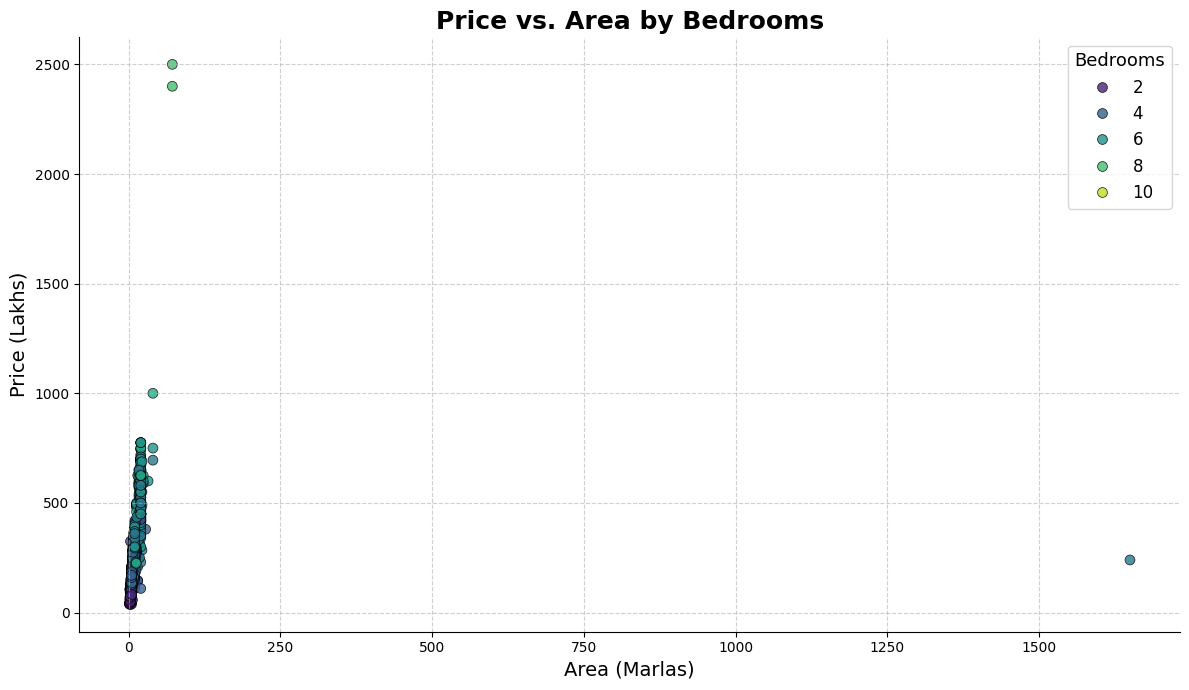

In [85]:
plt.figure(figsize=(12, 7))

sns.scatterplot(x='area_marlas', y='new_price', hue='bedrooms', data=df,
                palette='viridis',  
                s=50,  
                alpha=0.8,  
                edgecolor='black')  

plt.title("Price vs. Area by Bedrooms", fontsize=18, fontweight='bold')
plt.xlabel("Area (Marlas)", fontsize=14)
plt.ylabel("Price (Lakhs)", fontsize=14)
plt.legend(title='Bedrooms', fontsize=12, title_fontsize=13)

plt.grid(True, linestyle='--', alpha=0.6)

sns.despine()

plt.tight_layout()
plt.show()

Concentration of Data Points in Lower Area Ranges: The plot reveals a high concentration of data points in the lower area ranges (below 250 marlas). This suggests that the majority of properties in the dataset are relatively smaller in size. This could reflect the prevalent housing types in Multan, such as smaller residential plots or apartments, or potentially the availability of data skewed towards these types of properties.

Price Increase with Area (Generally): While there's a lot of overlap, there's a general trend of increasing price with increasing area. This trend is more evident in the lower area ranges. This is an expected pattern, as larger properties typically command higher prices. However, the scatter plot also shows that the relationship isn't strictly linear, with variations and potential outliers.

Impact of Bedrooms on Price: The color-coding by the number of bedrooms reveals that properties with more bedrooms tend to have higher prices. This is particularly noticeable in the higher price ranges. This suggests that the number of bedrooms is a significant factor influencing property prices in Multan, aligning with typical real estate trends where larger families or those seeking more space are willing to pay a premium.

Potential Outliers and Data Variability: The plot shows a few potential outliers, particularly in the higher area ranges. These outliers could represent unique properties or data entry errors. The significant scatter of points, especially in the lower area ranges, indicates considerable variability in prices even for properties of similar sizes and bedroom counts. This suggests that other factors, such as location, amenities, or property condition, are also likely playing a role in determining property prices in Multan.

In [86]:
df.head()

location  \
0                        New Shalimar Colony, Multan   
1                DHA Phase 1 - Sector H, DHA Phase 1   
2  Buch Executive Villas Extension, Buch Executiv...   
3                      Buch Executive Villas, Multan   
4                            DHA Villas, DHA Defence   

                                                link  bedrooms  bathrooms_int  \
0  https://www.zameen.com/Property/multan_new_sha...       3.0              4   
1  https://www.zameen.com/Property/dha_phase_1_dh...       7.0              6   
2  https://www.zameen.com/Property/buch_executive...       6.0              6   
3  https://www.zameen.com/Property/multan_buch_ex...       4.0              6   
4  https://www.zameen.com/Property/dha_defence_dh...       3.0              3   

   area_marlas  new_price  agency_int  price_per_marla  
0          4.0      120.0           0        30.000000  
1         20.0      420.0           0        21.000000  
2          8.3      320.0           0        38.554217  
3          5.0      195.0           0        39.000000  
4          5.0      200.0           0        40.000000

In [87]:
df['bathrooms_int'] = df['bathrooms_int'].astype('int64')

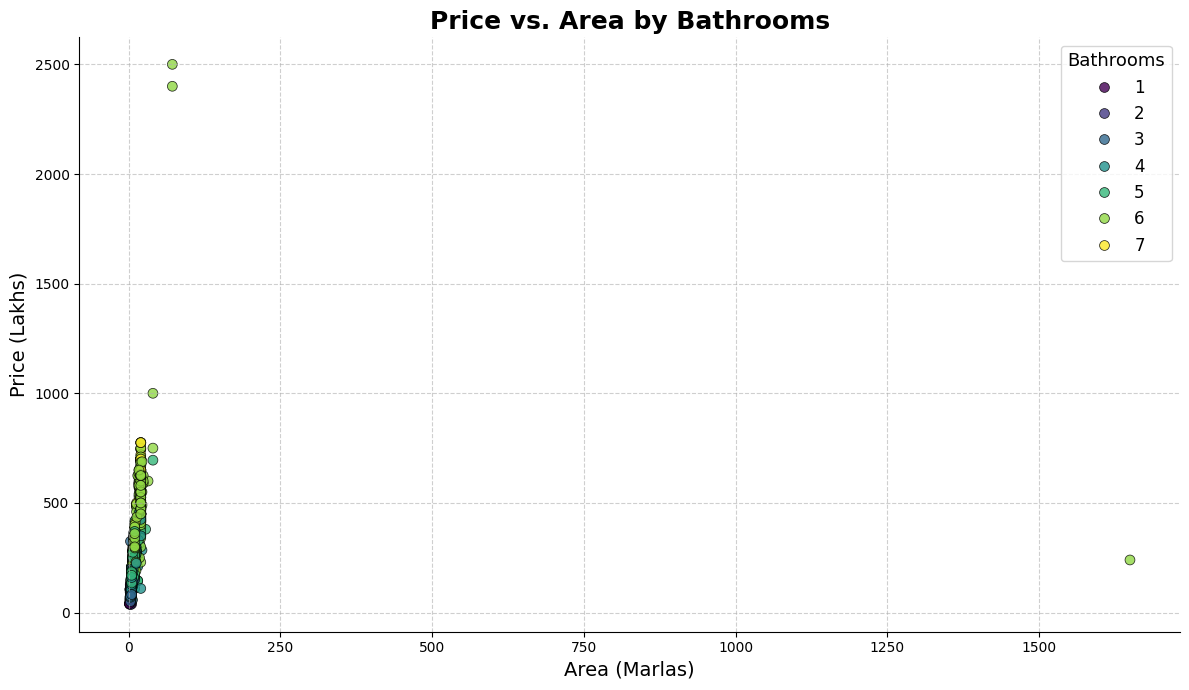

In [88]:
plt.figure(figsize=(12, 7))

sns.scatterplot(x='area_marlas', y='new_price', hue='bathrooms_int', data=df,
                palette='viridis',  
                s=50,  
                alpha=0.8,  
                edgecolor='black')  

plt.title("Price vs. Area by Bathrooms", fontsize=18, fontweight='bold')
plt.xlabel("Area (Marlas)", fontsize=14)
plt.ylabel("Price (Lakhs)", fontsize=14)
plt.legend(title='Bathrooms', fontsize=12, title_fontsize=13)

plt.grid(True, linestyle='--', alpha=0.6)

sns.despine()

plt.tight_layout()
plt.show()

Dominance of Lower Area Properties: Similar to the Bedrooms plot, the data points are heavily concentrated in the lower area ranges (below approximately 250 marlas). This reaffirms that the majority of properties in the dataset are relatively small, which aligns with the common housing types in Multan.

Positive Correlation Between Price and Area: There is a clear positive correlation between property area and price. As the area increases, the price generally tends to increase as well. This is consistent with general real estate trends, where larger properties command higher prices. However, the scatter plot reveals that this relationship is not perfectly linear, with variations suggesting other influencing factors.

Impact of Bathrooms on Price: The color-coding by the number of bathrooms indicates that properties with a higher number of bathrooms tend to have higher prices, particularly in the higher price range. This suggests that the number of bathrooms is a significant factor influencing property prices in Multan. It aligns with the expectation that properties with more amenities are generally more valuable.

Outliers and Price Variability: The plot reveals potential outliers, especially in the higher area ranges. These could represent unique properties or data errors. Additionally, the significant scatter of points in the lower area ranges indicates considerable price variability even for properties with similar areas and bathroom counts. This suggests that other factors, such as location, property condition, and other amenities, are influencing property prices in Multan.

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 21.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


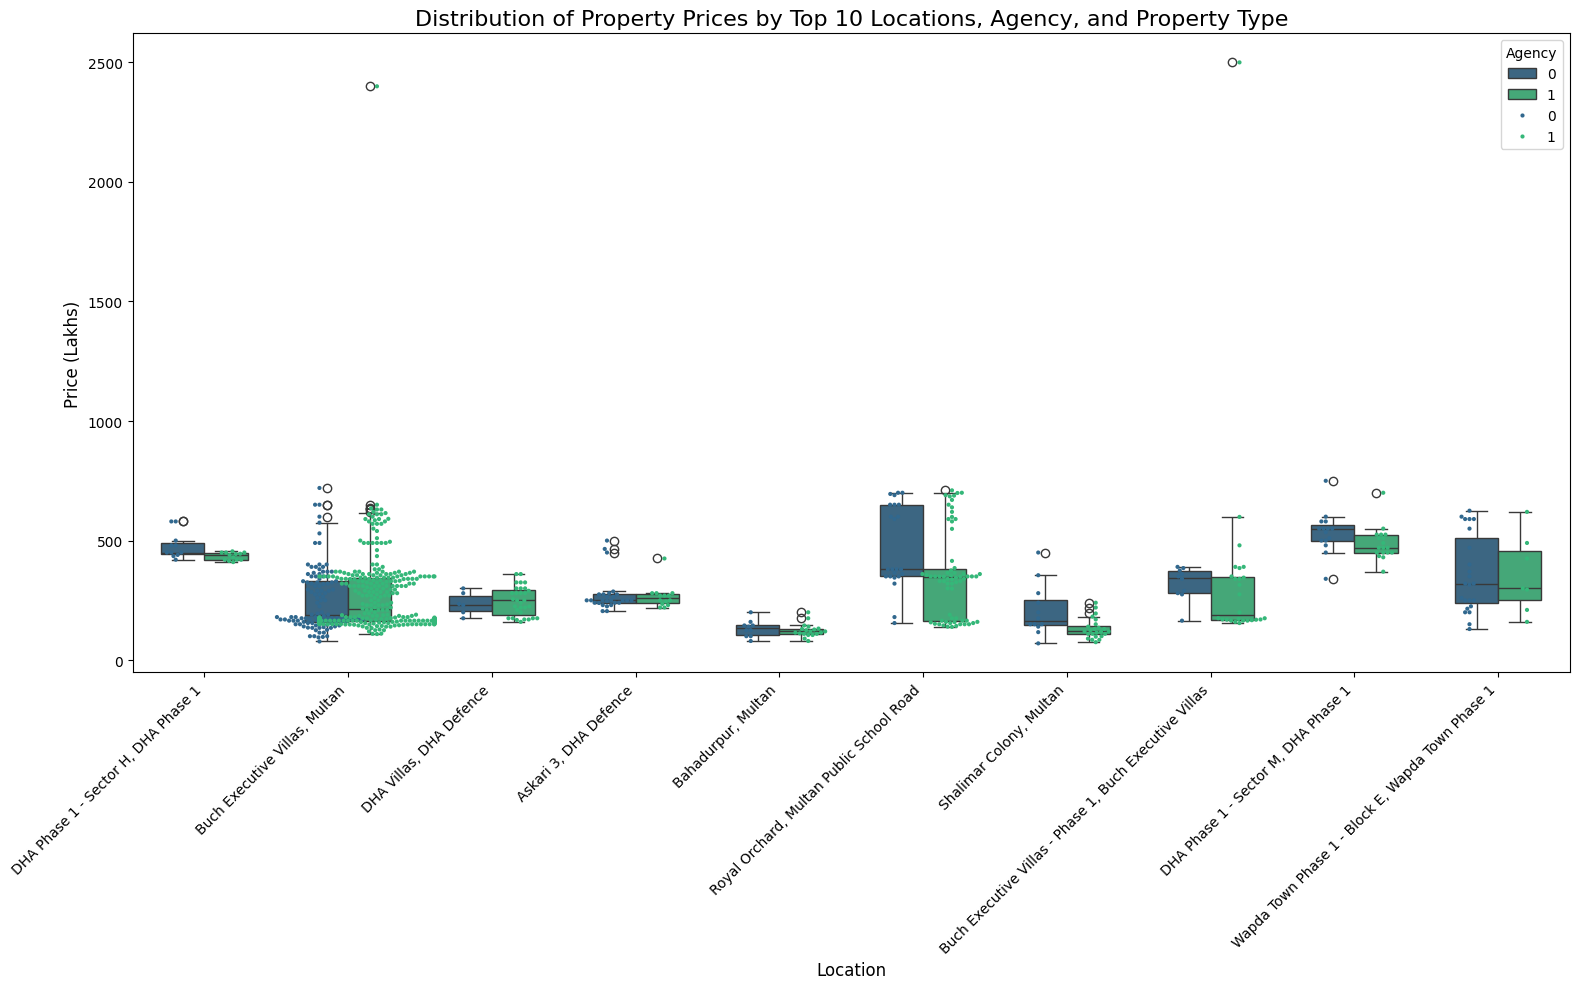

In [89]:
top_10_locations = df['location'].value_counts().nlargest(10).index
df_top_10 = df[df['location'].isin(top_10_locations)]

plt.figure(figsize=(16, 10))

sns.boxplot(x='location', y='new_price', hue='agency_int', data=df_top_10, palette='viridis', width=0.6)
sns.swarmplot(x='location', y='new_price', hue='agency_int', data=df_top_10, palette='viridis', dodge=True, size=3)

plt.title("Distribution of Property Prices by Top 10 Locations, Agency, and Property Type", fontsize=16)
plt.xlabel("Location", fontsize=12)
plt.ylabel("Price (Lakhs)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.legend(title='Agency')

plt.tight_layout()
plt.show()

Combined Insights from Box and Swarm Plots: The combination of box plots and swarm plots provides a more nuanced understanding of property price distribution. The box plots show the median, quartiles, and potential outliers, while the swarm plots reveal the actual distribution of individual data points. This allows for a more detailed assessment of price variation within each location and agency.

Significant Price Variation Across Locations with Overlaid Data Points: The swarm plot clearly shows the spread of data points across the different locations. "Royal Orchard, Multan Public School Road" and "DHA Phase 1 - Sector M, DHA Phase 1" demonstrate a wider range of prices with more data points in the higher price regions, confirming the box plot's observation of higher property values in these areas.

Agency-Specific Price Distributions and Overlap: The hue representing agencies (0 and 1) shows how prices vary between agencies in different locations. In some locations, there's a clear separation, suggesting different pricing strategies or property types handled by each agency. However, in other locations, there's significant overlap, indicating that both agencies deal with properties in similar price ranges. The swarm plot helps visualize the density and spread of data points for each agency.

Outliers and Data Clustering: The overlaid swarm plot highlights the presence of outliers more effectively. It also shows clustering patterns of data points, suggesting that prices are not uniformly distributed within each location and agency. For example, in "Buch Executive Villas, Multan," the swarm plot shows a relatively dense cluster of data points in the lower price range, with a few outliers in the higher price range. This indicates that most properties in this location are priced lower, with a few exceptions.

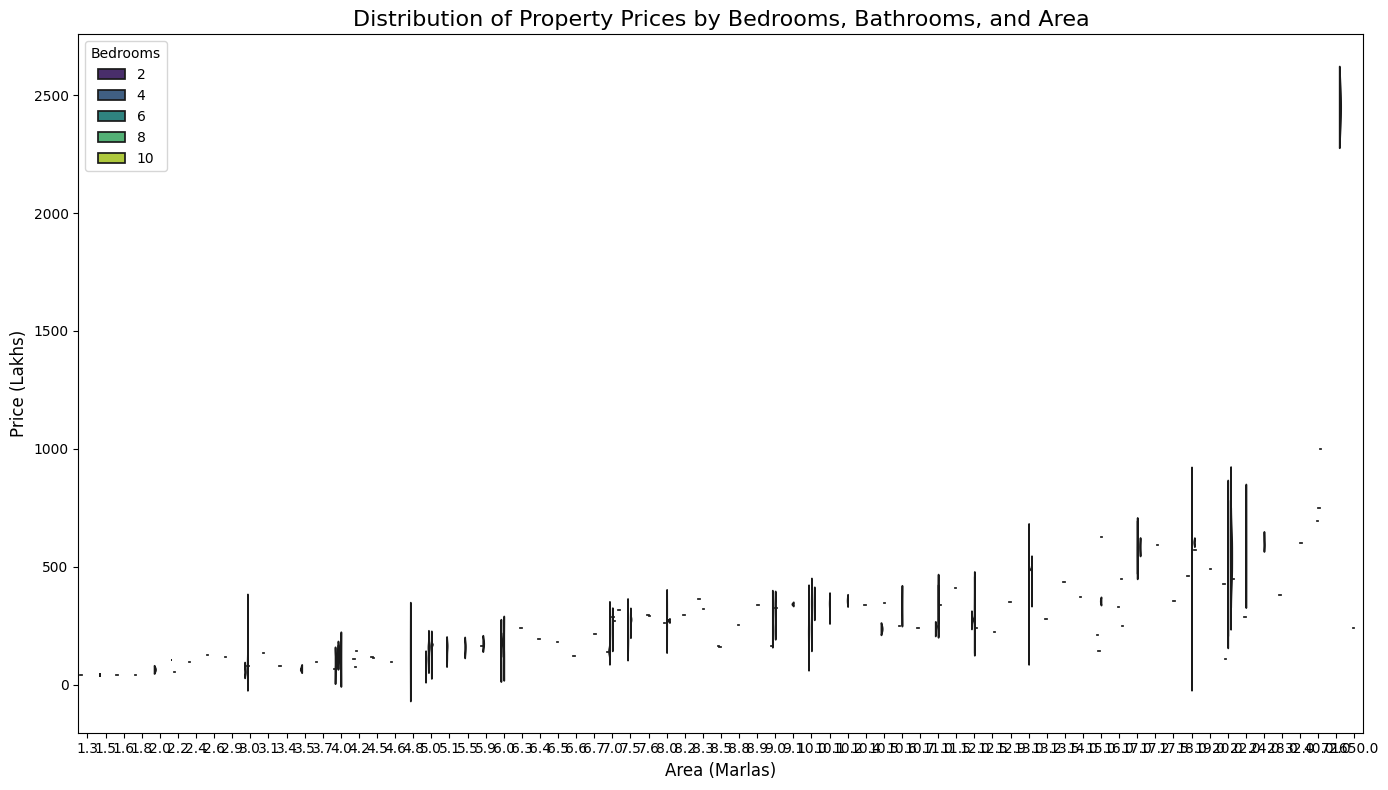

In [90]:
plt.figure(figsize=(14, 8))

sns.violinplot(x='area_marlas', y='new_price', hue='bedrooms', data=df, palette='viridis', split=True, inner='quartile')

plt.title("Distribution of Property Prices by Bedrooms, Bathrooms, and Area", fontsize=16)
plt.xlabel("Area (Marlas)", fontsize=12)
plt.ylabel("Price (Lakhs)", fontsize=12)
plt.legend(title='Bedrooms')

plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_8508\3434454986.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_locations.index, y=top_10_locations.values, palette='viridis')


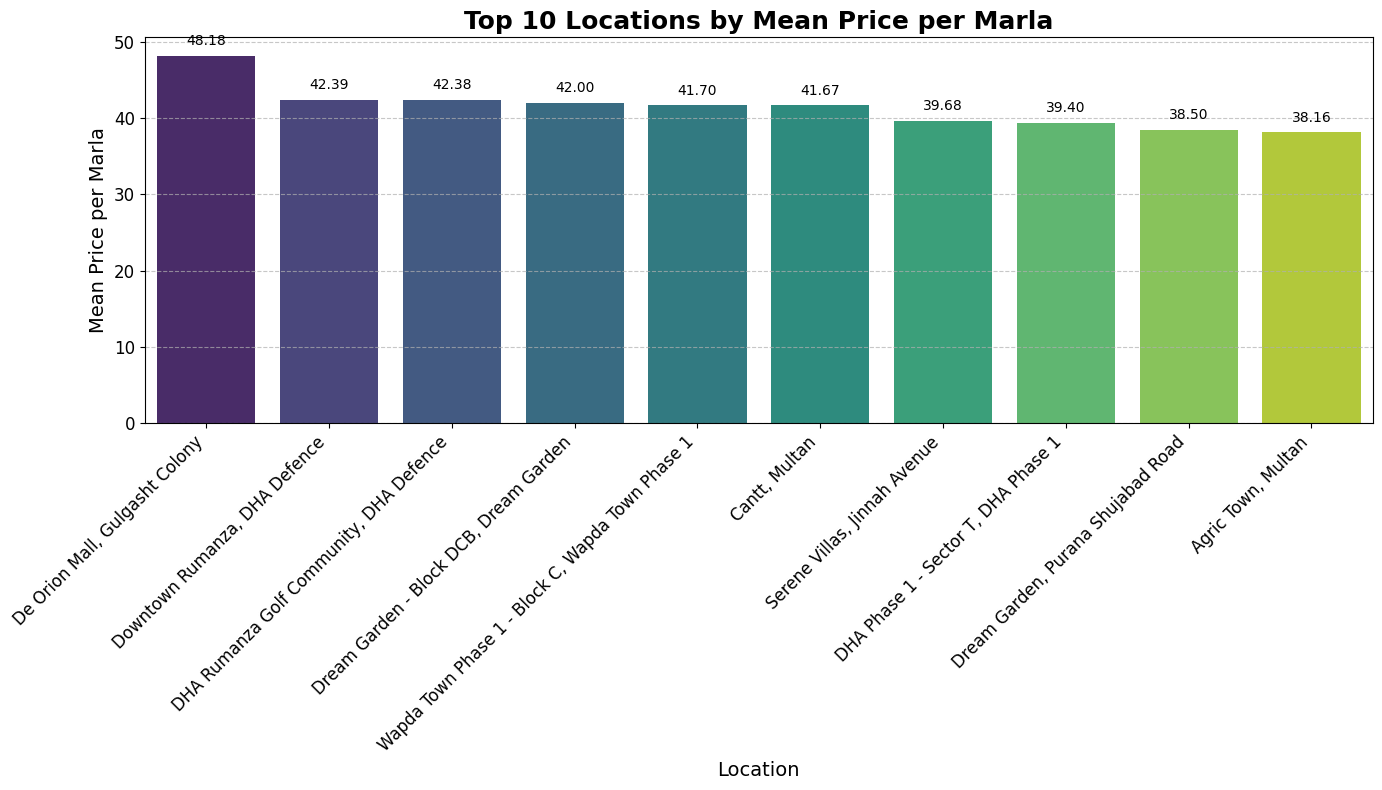

In [91]:
location_prices = df.groupby('location')['price_per_marla'].mean()

top_10_locations = location_prices.nlargest(10)

plt.figure(figsize=(14, 8))

sns.barplot(x=top_10_locations.index, y=top_10_locations.values, palette='viridis')  

plt.title('Top 10 Locations by Mean Price per Marla', fontsize=18, fontweight='bold')
plt.xlabel('Location', fontsize=14)
plt.ylabel('Mean Price per Marla', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  

for i, value in enumerate(top_10_locations.values):
    plt.text(i, value + 1, f'{value:.2f}', ha='center', va='bottom', fontsize=10) 

plt.tight_layout() 
plt.show()

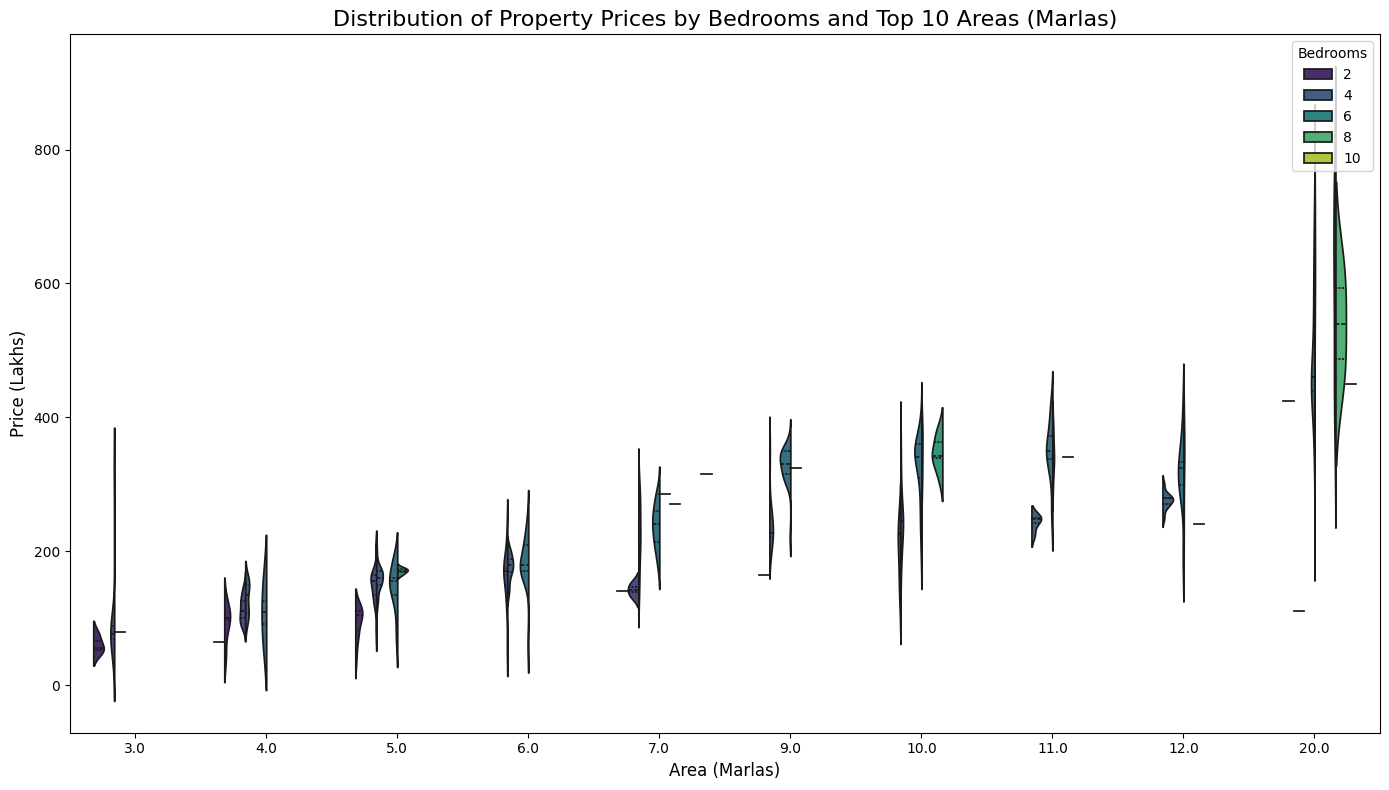

In [92]:
top_10_marlas = df['area_marlas'].value_counts().nlargest(10).index

filtered_df = df[df['area_marlas'].isin(top_10_marlas)]

plt.figure(figsize=(14, 8))

sns.violinplot(x='area_marlas', y='new_price', hue='bedrooms', data=filtered_df, palette='viridis', split=True, inner='quartile')

plt.title("Distribution of Property Prices by Bedrooms and Top 10 Areas (Marlas)", fontsize=16)
plt.xlabel("Area (Marlas)", fontsize=12)
plt.ylabel("Price (Lakhs)", fontsize=12)
plt.legend(title='Bedrooms')

plt.tight_layout()
plt.show()

Price Increase with Area: The plot clearly demonstrates a trend of increasing property prices with increasing area (Marlas). As you move from left to right along the x-axis, representing larger areas, the violins generally shift upwards, indicating higher price distributions. This aligns with the expectation that larger properties command higher prices in Multan.

Impact of Bedrooms on Price Distribution: The color-coding by the number of bedrooms reveals how the number of bedrooms influences price distribution within each area category. Generally, violins with more bedrooms tend to be located higher on the y-axis, indicating higher prices. This suggests that the number of bedrooms is a significant factor influencing property prices in Multan, even when controlling for area.

Variability in Price Distributions: The width of the violins at different points indicates the density of data points at those price levels. Some violins are wider in the lower price ranges, suggesting a concentration of properties at those prices. Others are wider in the higher price ranges, indicating a concentration of more expensive properties. This variability suggests that other factors, such as location, property condition, or amenities, are also playing a role in determining property prices.

Skewness and Outliers: The shape of the violins reveals the skewness of the price distributions. Some violins are skewed towards the higher price ranges, indicating that there are more properties with higher prices than lower prices. The long tails of some violins suggest the presence of potential outliers, particularly in the higher price ranges. These outliers could represent unique properties or data entry errors.

In [93]:
df.columns

Index(['location', 'link', 'bedrooms', 'bathrooms_int', 'area_marlas',
       'new_price', 'agency_int', 'price_per_marla'],
      dtype='object')

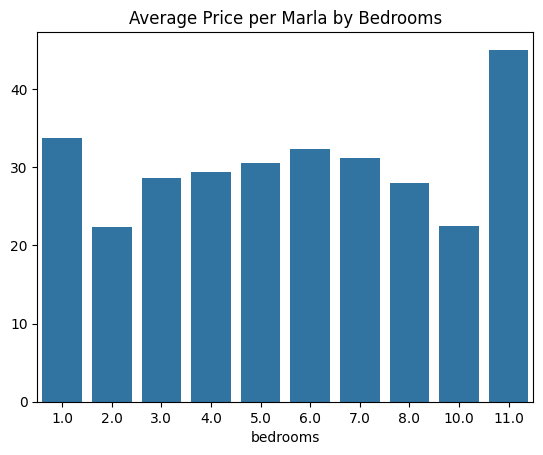

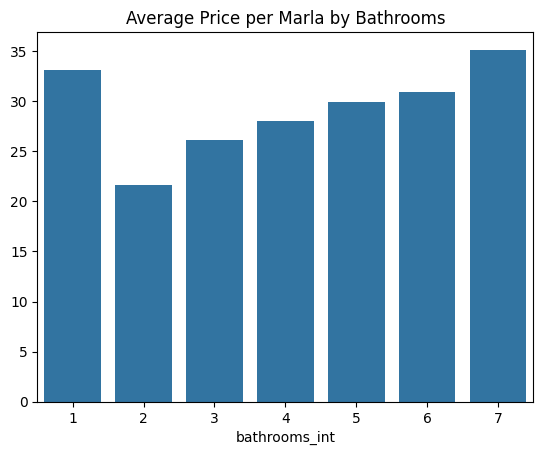

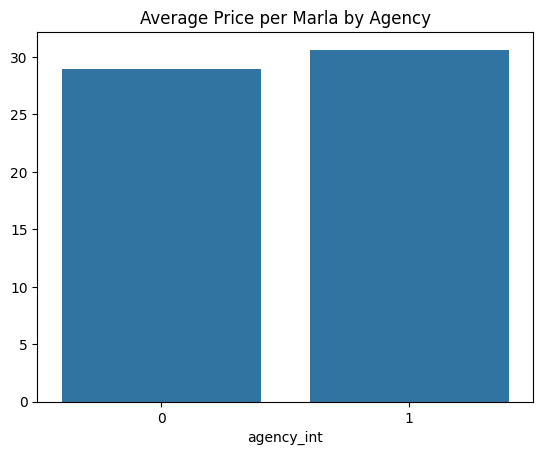

In [94]:
bedrooms_prices = df.groupby('bedrooms')['price_per_marla'].mean()
sns.barplot(x=bedrooms_prices.index, y=bedrooms_prices.values)
plt.title('Average Price per Marla by Bedrooms')
plt.show()

bathrooms_prices = df.groupby('bathrooms_int')['price_per_marla'].mean()
sns.barplot(x=bathrooms_prices.index, y=bathrooms_prices.values)
plt.title('Average Price per Marla by Bathrooms')
plt.show()

agency_prices = df.groupby('agency_int')['price_per_marla'].mean() #or 'agency'
sns.barplot(x=agency_prices.index, y=agency_prices.values)
plt.title('Average Price per Marla by Agency')
plt.show()

In [95]:
print(bedrooms_prices)

bedrooms
1.0     33.713844
2.0     22.335960
3.0     28.611799
4.0     29.352182
5.0     30.488741
6.0     32.344187
7.0     31.211974
8.0     27.918403
10.0    22.500000
11.0    45.000000
Name: price_per_marla, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_8508\3205689943.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=bedrooms_prices.index, y=bedrooms_prices.values, palette='viridis')


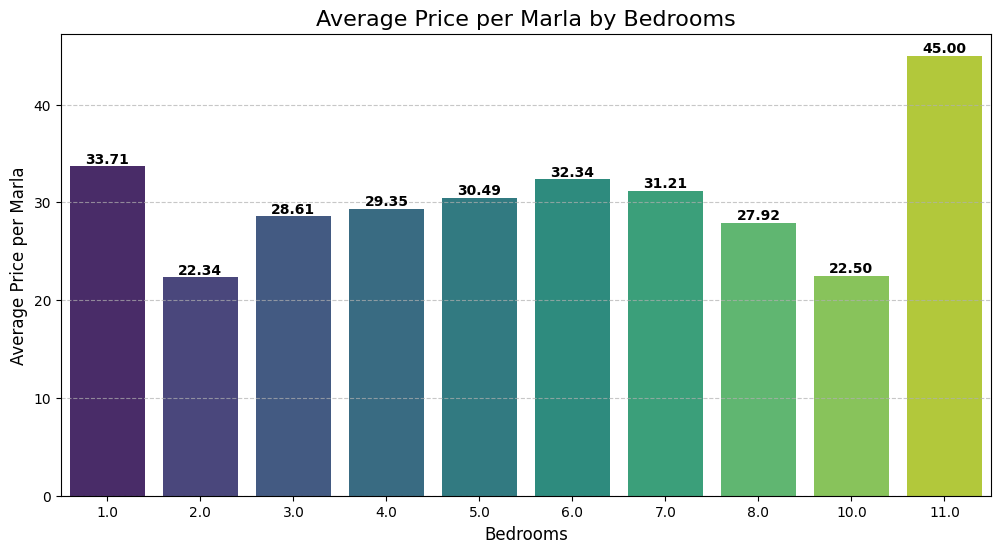

In [96]:
bedrooms_prices = df.groupby('bedrooms')['price_per_marla'].mean()

plt.figure(figsize=(12, 6))

ax = sns.barplot(x=bedrooms_prices.index, y=bedrooms_prices.values, palette='viridis')

plt.title('Average Price per Marla by Bedrooms', fontsize=16)
plt.xlabel('Bedrooms', fontsize=12)
plt.ylabel('Average Price per Marla', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(bedrooms_prices.values):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')


C:\Users\hp\AppData\Local\Temp\ipykernel_8508\4096079165.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=bathrooms_prices.index, y=bathrooms_prices.values, palette='viridis')


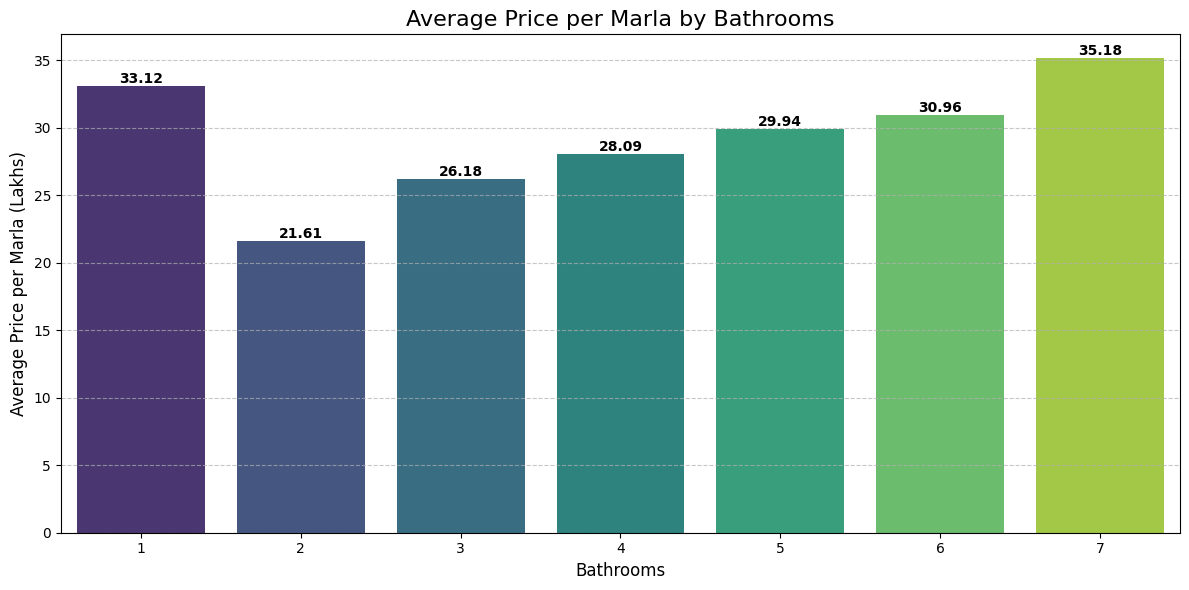

In [97]:
bathrooms_prices = df.groupby('bathrooms_int')['price_per_marla'].mean()

plt.figure(figsize=(12, 6))

ax = sns.barplot(x=bathrooms_prices.index, y=bathrooms_prices.values, palette='viridis')

plt.title('Average Price per Marla by Bathrooms', fontsize=16)
plt.xlabel('Bathrooms', fontsize=12)
plt.ylabel('Average Price per Marla (Lakhs)', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(bathrooms_prices.values):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')  

plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_8508\560782605.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=agency_prices.index, y=agency_prices.values, palette='viridis')


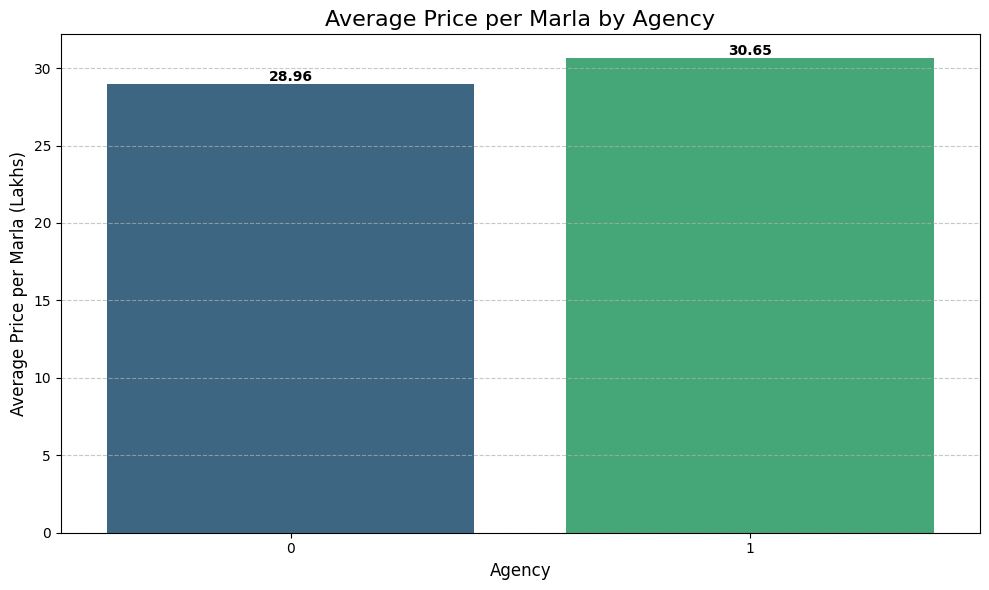

In [98]:
agency_prices = df.groupby('agency_int')['price_per_marla'].mean()  

plt.figure(figsize=(10, 6))

ax = sns.barplot(x=agency_prices.index, y=agency_prices.values, palette='viridis')

plt.title('Average Price per Marla by Agency', fontsize=16)
plt.xlabel('Agency', fontsize=12)
plt.ylabel('Average Price per Marla (Lakhs)', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(agency_prices.values):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

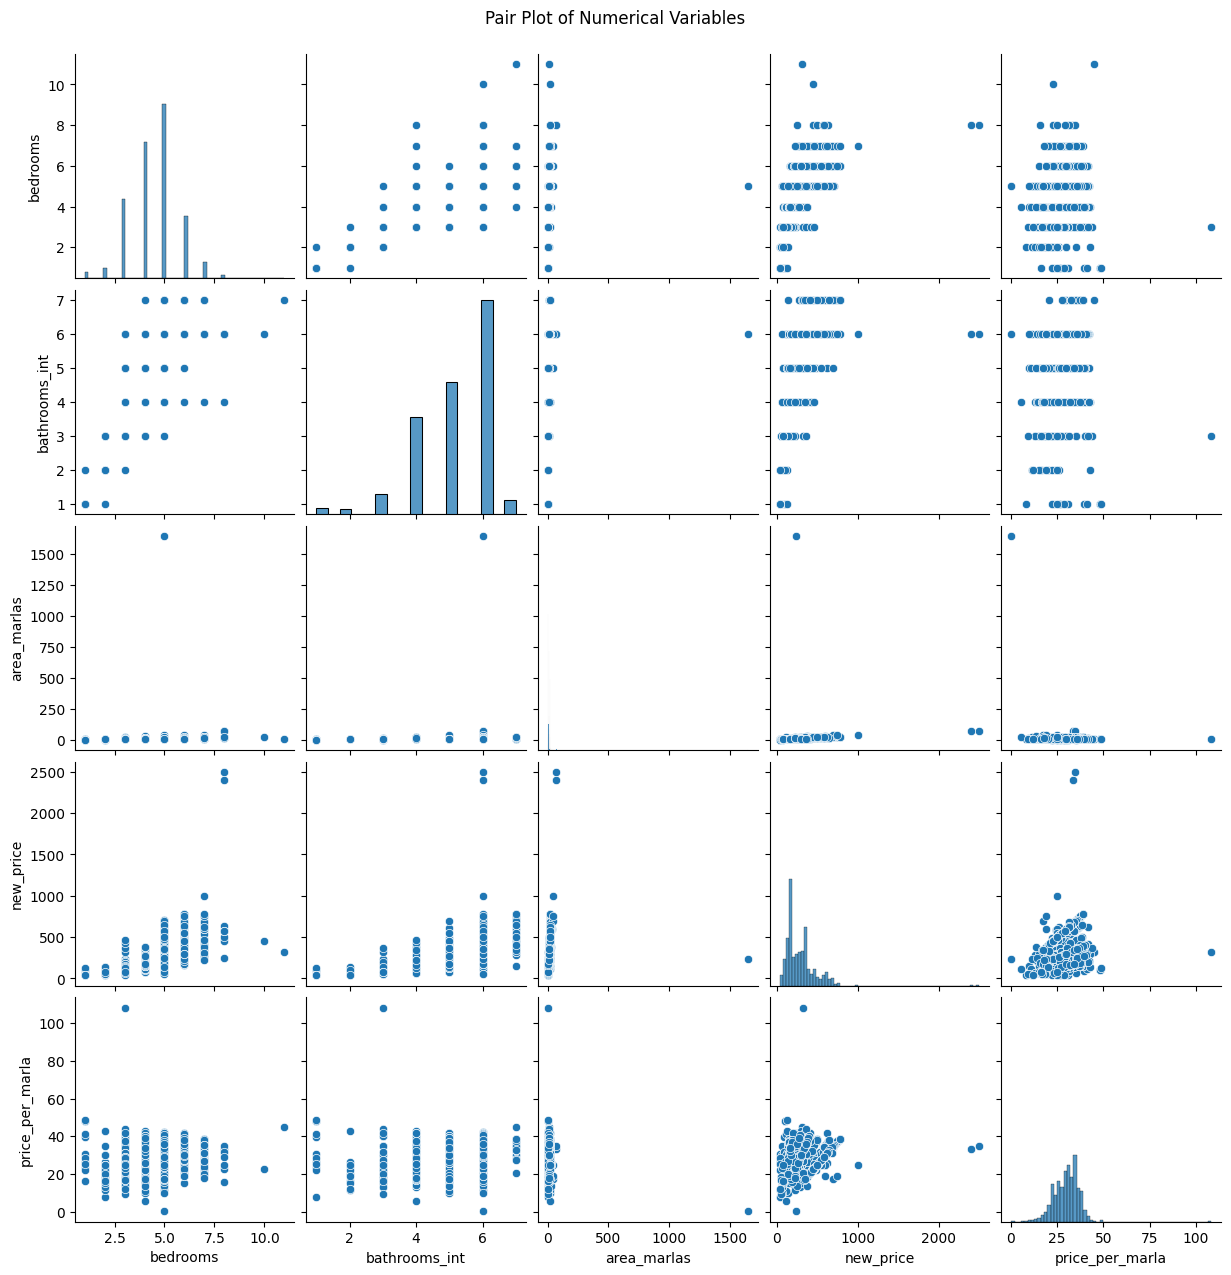

In [99]:
numerical_df = df[['bedrooms', 'bathrooms_int', 'area_marlas', 'new_price', 'price_per_marla']]

sns.pairplot(numerical_df)
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)  # Add a title
plt.show()

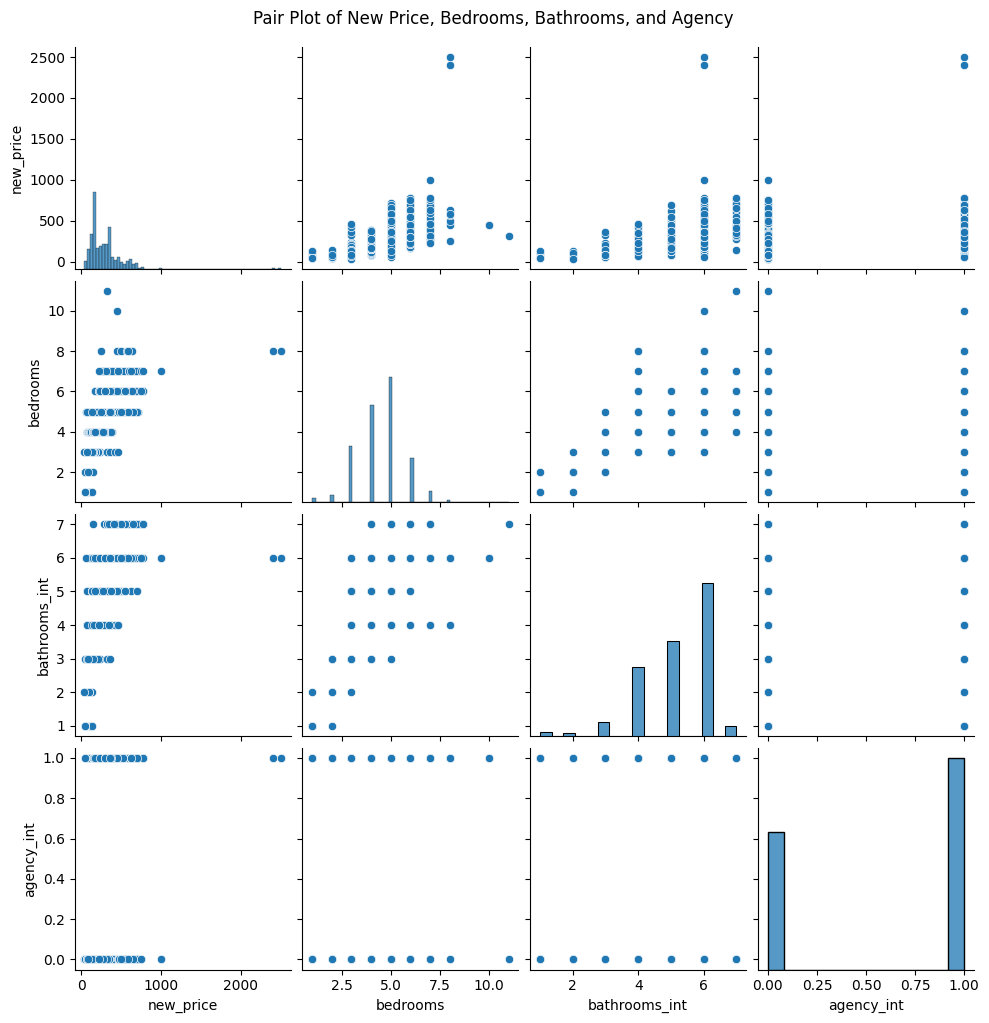

In [100]:
numerical_df = df[['new_price', 'bedrooms', 'bathrooms_int', 'agency_int']]

sns.pairplot(numerical_df)

plt.suptitle("Pair Plot of New Price, Bedrooms, Bathrooms, and Agency", y=1.02)

plt.show()

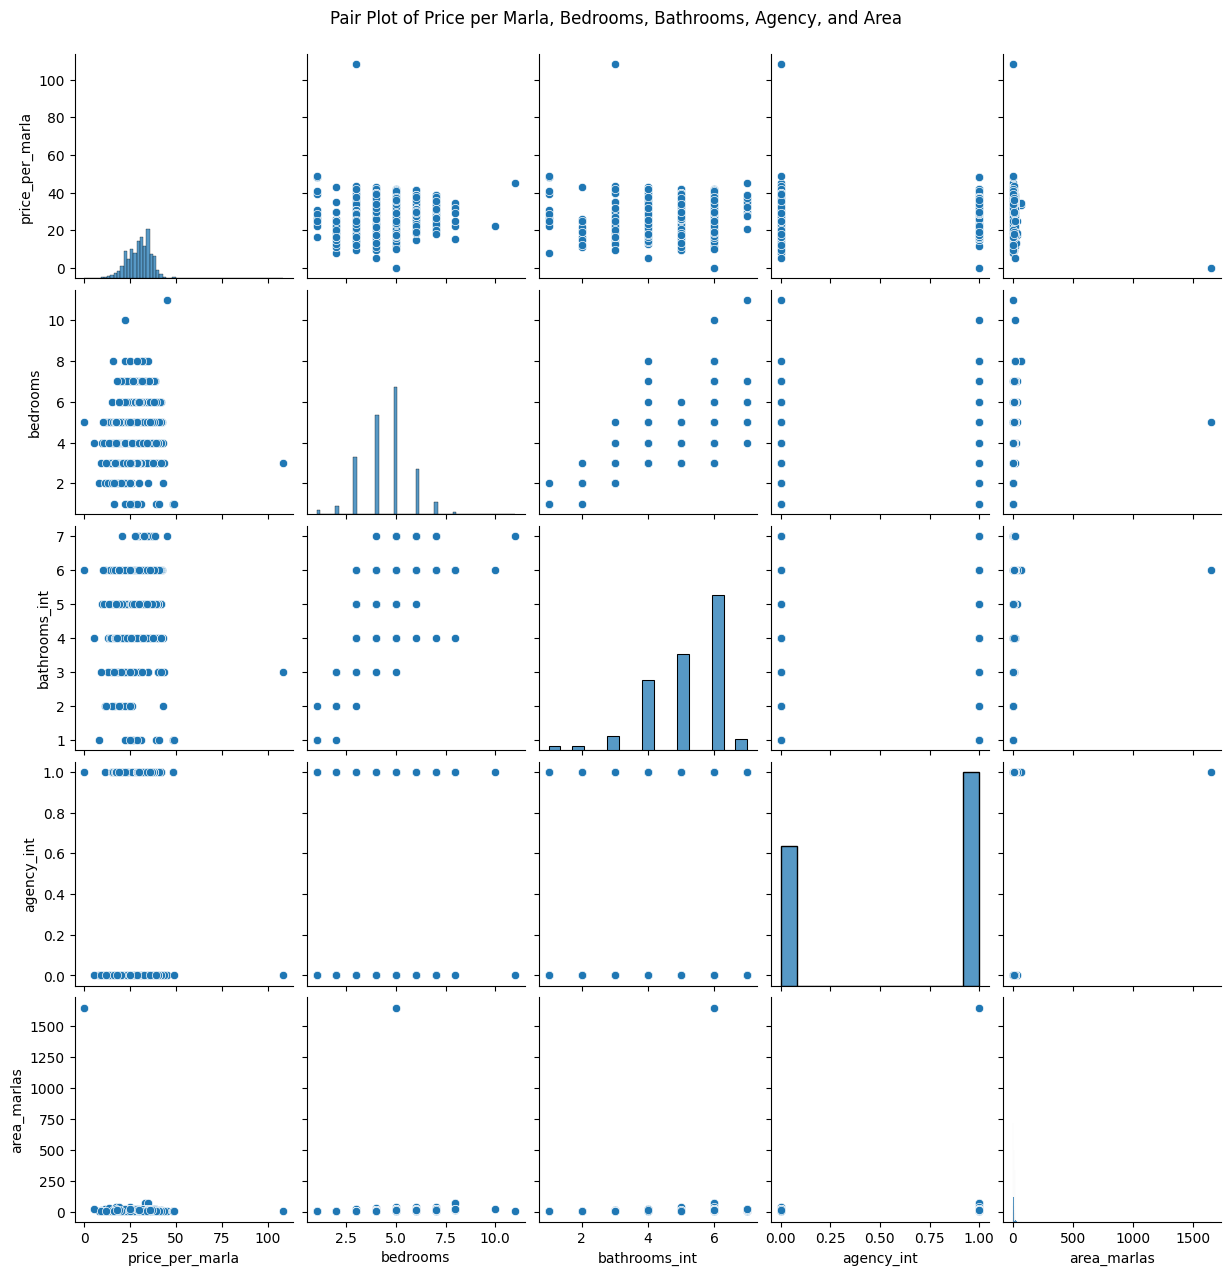

In [101]:
numerical_df = df[['price_per_marla', 'bedrooms', 'bathrooms_int', 'agency_int', 'area_marlas']]

sns.pairplot(numerical_df)

plt.suptitle("Pair Plot of Price per Marla, Bedrooms, Bathrooms, Agency, and Area", y=1.02)

plt.show()

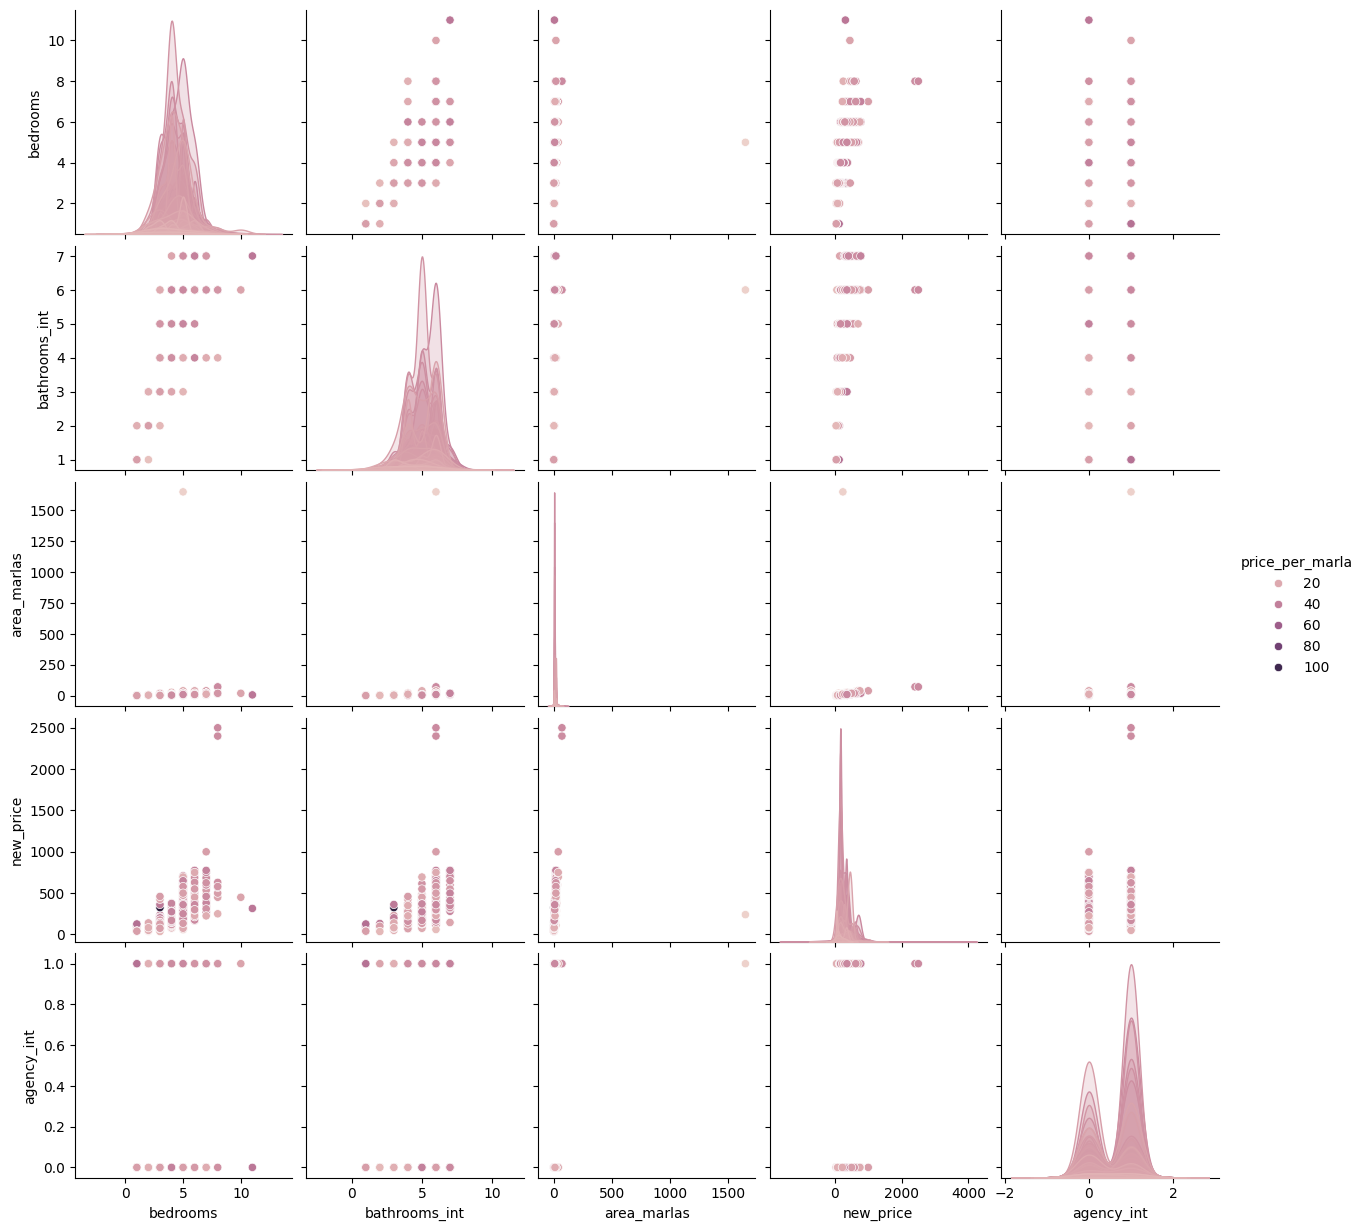

In [102]:
sns.pairplot(data=df, hue='price_per_marla') 
plt.show()

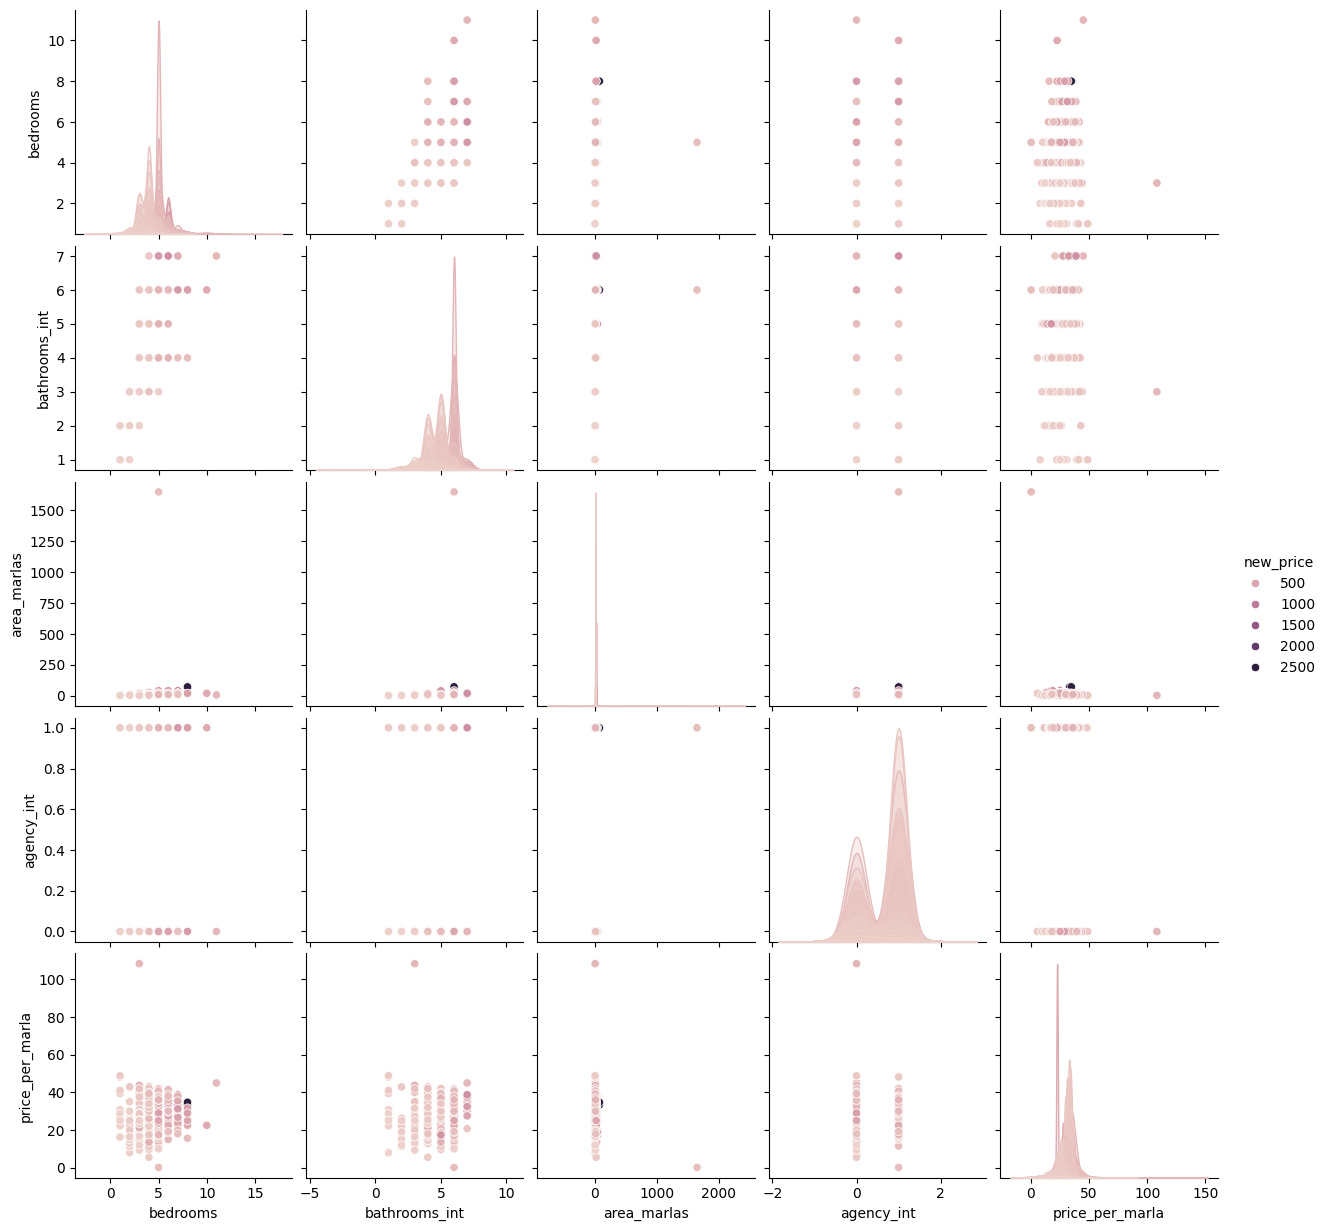

In [103]:
sns.pairplot(data=df, hue='new_price') 
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_8508\264098122.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


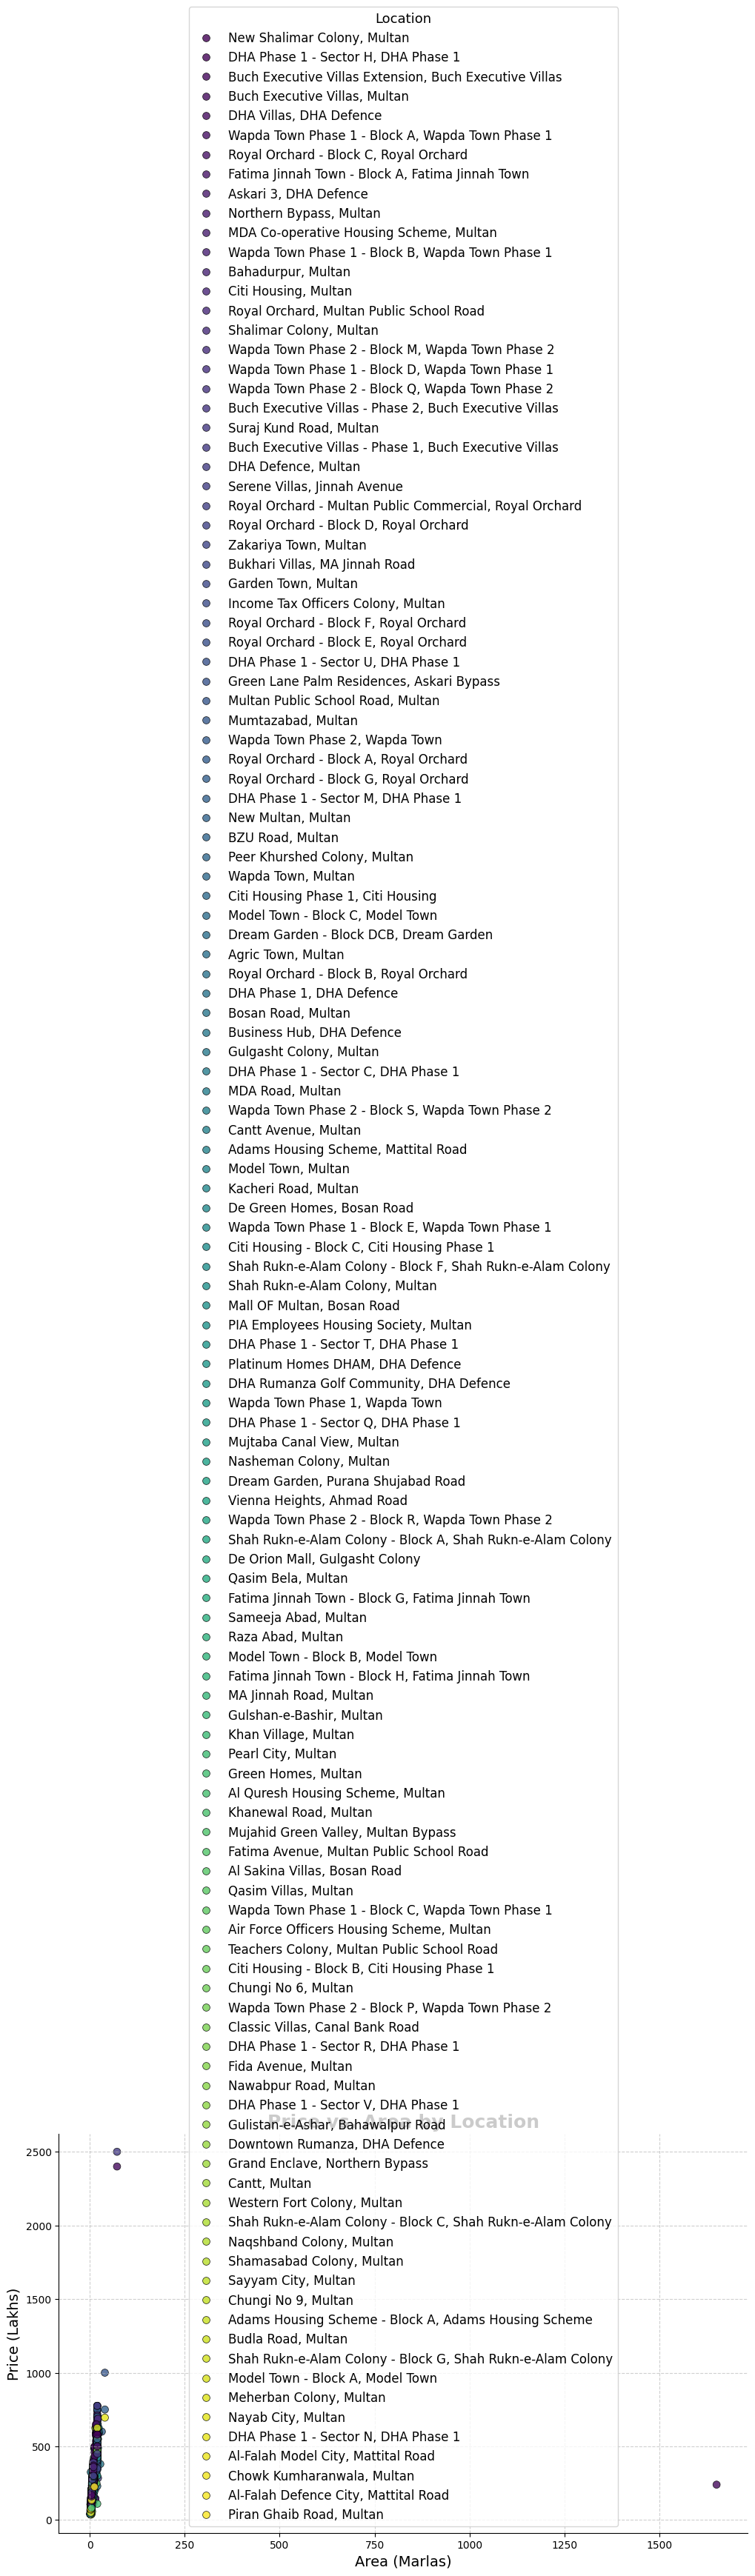

In [104]:
plt.figure(figsize=(12, 7))

sns.scatterplot(x='area_marlas', y='new_price', hue='location', data=df, palette='viridis', s=50, alpha=0.8, edgecolor='black')

plt.title("Price vs. Area by Location", fontsize=18, fontweight='bold')
plt.xlabel("Area (Marlas)", fontsize=14)
plt.ylabel("Price (Lakhs)", fontsize=14)
plt.legend(title='Location', fontsize=12, title_fontsize=13)

plt.grid(True, linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.show()

Now regression analysis


In [105]:
df.head()

location  \
0                        New Shalimar Colony, Multan   
1                DHA Phase 1 - Sector H, DHA Phase 1   
2  Buch Executive Villas Extension, Buch Executiv...   
3                      Buch Executive Villas, Multan   
4                            DHA Villas, DHA Defence   

                                                link  bedrooms  bathrooms_int  \
0  https://www.zameen.com/Property/multan_new_sha...       3.0              4   
1  https://www.zameen.com/Property/dha_phase_1_dh...       7.0              6   
2  https://www.zameen.com/Property/buch_executive...       6.0              6   
3  https://www.zameen.com/Property/multan_buch_ex...       4.0              6   
4  https://www.zameen.com/Property/dha_defence_dh...       3.0              3   

   area_marlas  new_price  agency_int  price_per_marla  
0          4.0      120.0           0        30.000000  
1         20.0      420.0           0        21.000000  
2          8.3      320.0           0        38.554217  
3          5.0      195.0           0        39.000000  
4          5.0      200.0           0        40.000000

In [106]:
df.shape

(1225, 8)

In [107]:
X = df[['area_marlas', 'bedrooms', 'bathrooms_int', 'agency_int']]
y = df['new_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 11775.893274277805
R-squared: 0.5776945115709029


decision tree regressor

In [108]:
X = df[['area_marlas', 'bedrooms', 'bathrooms_int', 'agency_int']]
y = df['new_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Decision Tree Regression - Mean Squared Error: {mse}")
print(f"Decision Tree Regression - R-squared: {r2}")

Decision Tree Regression - Mean Squared Error: 3137.3409350383854
Decision Tree Regression - R-squared: 0.887489104641088


random forest

In [109]:
X = df[['area_marlas', 'bedrooms', 'bathrooms_int', 'agency_int']]
y = df['new_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)  

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regression - Mean Squared Error: {mse}")
print(f"Random Forest Regression - R-squared: {r2}")

Random Forest Regression - Mean Squared Error: 2532.39929982913
Random Forest Regression - R-squared: 0.9091834395656553


Gradient boost 

In [110]:
X = df[['area_marlas', 'bedrooms', 'bathrooms_int', 'agency_int']]
y = df['new_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(random_state=42)  

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting Regression - Mean Squared Error: {mse}")
print(f"Gradient Boosting Regression - R-squared: {r2}")

Gradient Boosting Regression - Mean Squared Error: 2500.0549281589915
Gradient Boosting Regression - R-squared: 0.9103433690383456


SVR

In [111]:
X = df[['area_marlas', 'bedrooms', 'bathrooms_int', 'agency_int']]
y = df['new_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVR()  

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Support Vector Regression - Mean Squared Error: {mse}")
print(f"Support Vector Regression - R-squared: {r2}")

Support Vector Regression - Mean Squared Error: 24934.405694143228
Support Vector Regression - R-squared: 0.10580572275098199


KNN

In [112]:
X = df[['area_marlas', 'bedrooms', 'bathrooms_int', 'agency_int']]
y = df['new_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsRegressor(n_neighbors=5)  

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"K-Nearest Neighbors Regression - Mean Squared Error: {mse}")
print(f"K-Nearest Neighbors Regression - R-squared: {r2}")

K-Nearest Neighbors Regression - Mean Squared Error: 2917.7137699755103
K-Nearest Neighbors Regression - R-squared: 0.8953653442650298


so two are doing good

Random Forest Regression:
Gradient Boosting Regression

In [113]:
X = df[['area_marlas', 'bedrooms', 'bathrooms_int', 'agency_int']]
y = df['new_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print("Random Forest - MSE:", rf_mse)
print("Random Forest - R-squared:", rf_r2)

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
print("Gradient Boosting - MSE:", gb_mse)
print("Gradient Boosting - R-squared:", gb_r2)

Random Forest - MSE: 2532.39929982913
Random Forest - R-squared: 0.9091834395656553
Gradient Boosting - MSE: 2500.0549281589915
Gradient Boosting - R-squared: 0.9103433690383456


In [114]:
df['predicted_price'] = df['area_marlas'] * df['price_per_marla']

print(df[['area_marlas', 'price_per_marla', 'new_price', 'predicted_price']].head())

   area_marlas  price_per_marla  new_price  predicted_price
0          4.0        30.000000      120.0            120.0
1         20.0        21.000000      420.0            420.0
2          8.3        38.554217      320.0            320.0
3          5.0        39.000000      195.0            195.0
4          5.0        40.000000      200.0            200.0


In [115]:
X = df[['area_marlas', 'bedrooms', 'bathrooms_int', 'agency_int']]
y = df['price_per_marla']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 34.69797710692822
R-squared: 0.01728075107852267


In [116]:
X = df[['area_marlas', 'bedrooms', 'bathrooms_int', 'agency_int']]
y = df['price_per_marla']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Decision Tree Regression - Mean Squared Error: {mse}")
print(f"Decision Tree Regression - R-squared: {r2}")

Decision Tree Regression - Mean Squared Error: 28.098925868129033
Decision Tree Regression - R-squared: 0.20417967769324463


In [117]:
X = df[['area_marlas', 'bedrooms', 'bathrooms_int', 'agency_int']]
y = df['price_per_marla']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)  

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regression - Mean Squared Error: {mse}")
print(f"Random Forest Regression - R-squared: {r2}")


Random Forest Regression - Mean Squared Error: 24.174151640336547
Random Forest Regression - R-squared: 0.3153374886929089


In [118]:
X = df[['area_marlas', 'bedrooms', 'bathrooms_int', 'agency_int']]
y = df['price_per_marla']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(random_state=42)  

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting Regression - Mean Squared Error: {mse}")
print(f"Gradient Boosting Regression - R-squared: {r2}")


Gradient Boosting Regression - Mean Squared Error: 24.83668255043743
Gradient Boosting Regression - R-squared: 0.29657322827636723


In [119]:
X = df[['area_marlas', 'bedrooms', 'bathrooms_int', 'agency_int']]
y = df['price_per_marla']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVR()  

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Support Vector Regression - Mean Squared Error: {mse}")
print(f"Support Vector Regression - R-squared: {r2}")

Support Vector Regression - Mean Squared Error: 32.98146019448795
Support Vector Regression - R-squared: 0.06589609847344313


In [120]:
X = df[['area_marlas', 'bedrooms', 'bathrooms_int', 'agency_int']]
y = df['price_per_marla']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsRegressor(n_neighbors=5)  

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"K-Nearest Neighbors Regression - Mean Squared Error: {mse}")
print(f"K-Nearest Neighbors Regression - R-squared: {r2}")

K-Nearest Neighbors Regression - Mean Squared Error: 28.099130860789927
K-Nearest Neighbors Regression - R-squared: 0.20417387187254432


because of different locations 

price_per_marla is not consistent.

In [124]:
X = df[['area_marlas', 'bedrooms', 'bathrooms_int', 'agency_int']]
y = df['new_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print("Random Forest - MSE:", rf_mse)
print("Random Forest - R-squared:", rf_r2)

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
print("Gradient Boosting - MSE:", gb_mse)
print("Gradient Boosting - R-squared:", gb_r2)

Random Forest - MSE: 2532.39929982913
Random Forest - R-squared: 0.9091834395656553
Gradient Boosting - MSE: 2500.0549281589915
Gradient Boosting - R-squared: 0.9103433690383456


In [121]:
import joblib


In [122]:
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [123]:
joblib.dump(gb_model, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']

Thanks.